imports

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from IPython.display import Image
#from mpl_toolkits.mplot3d import Axes3D
import string
import plotly.graph_objects as go

In [ ]:
file = open('distance_color_type_for_all_stars.txt', 'r')
file_csv = open('distance_color_type_for_all_stars_csv.csv', 'w')

header = [
    'ASASSN_id', 'distance', 'distance_low', 'distance_high', 'g_mag', 'Gaia_name', 'G_mag', 'G_mag_err',
    'abs_mag_G', 'abs_mag_G_low', 'abs_mag_G_high', 'ext_correct_G', 'ext_correct_G_low', 'ext_correct_G_high',
    'BP_RP', 'BP_RP_err', 'BP_RP_0', 'BP_RP_0_err', 'J_mag', 'J_mag_err', 'K_mag', 'K_mag_err',
    'abs_mag_J', 'abs_mag_J_low', 'abs_mag_J_high', 'ext_correct_J', 'ext_correct_J_low', 'ext_correct_J_high',
    'ext_correct_K', 'ext_correct_K_low', 'ext_correct_K_high', 'FinalType', 'ML_classifier_type',
    'visual_classification_type', 'VSX_type', 'VSX_RA', 'VSX_Dec', 'VSX_name'
]

file_csv.write(','.join(header) + '\n')

lines = file.readlines()
for line in lines:
    line_split = line.split()
    
    # Remove the first 'ASASSN' entry
    if line_split[0] == 'ASASSN':
        line_split = line_split[1:]
    
    cleaned_data = []
    for item in line_split:
        if '=' in item:
            continue  # Skip items with '='
        cleaned_data.append(item)
    
    # Combine Gaia_name into a single string
    gaia_start = 5  # Adjusted index where Gaia_name starts after removing 'ASASSN'
    gaia_end = 8    # Adjusted index where Gaia_name ends
    gaia_name = ' '.join(cleaned_data[gaia_start:gaia_end])
    cleaned_data = cleaned_data[:gaia_start] + [gaia_name] + cleaned_data[gaia_end:]
    
    # Combine VSX_name into a single string
    vsx_name_start = 37  # Adjusted index where VSX_name starts
    vsx_name = ' '.join(cleaned_data[vsx_name_start:])
    cleaned_data = cleaned_data[:vsx_name_start] + [vsx_name]

    all_letters = set(string.ascii_letters)
    if any(letter in all_letters for letter in cleaned_data[35]):
        continue
    
    file_csv.write(','.join(cleaned_data) + '\n')

file.close()
file_csv.close()

In [176]:
color_csv = pd.read_csv('distance_color_type_for_all_stars_csv.csv')

In [177]:
exclude_distance_99999 = color_csv[color_csv["distance"] < 99998]
K_mag_clean_1 = exclude_distance_99999[(exclude_distance_99999["K_mag"] != 99.999)]
K_mag_clean_2 = K_mag_clean_1[K_mag_clean_1["K_mag"] > 1]
K_mag_clean_2["J_minus_K"] = K_mag_clean_2["J_mag"] - K_mag_clean_2["K_mag"]
clean_final = K_mag_clean_2[K_mag_clean_2["J_minus_K"] > -1]
clean_final

,ASASSN_id,distance,distance_low,distance_high,g_mag,Gaia_name,G_mag,G_mag_err,abs_mag_G,abs_mag_G_low,...,ext_correct_K_low,ext_correct_K_high,FinalType,ML_classifier_type,visual_classification_type,VSX_type,VSX_RA,VSX_Dec,VSX_name,J_minus_K
0,8590948612,3778,3484,4082,13.245,Gaia DR3 2875539776437822592,12.869,0.012,-0.138,0.038,...,0.015,0.015,RRAB,RRL_ab,NaN,RRAB,0.01521,35.36286,GM And,0.336
1,661428773073,5833,4946,7076,13.951,Gaia DR3 2774083440496341504,15.181,0.017,1.279,1.637,...,0.009,0.009,RRAB,RRL_ab,NaN,RRAB,0.01669,18.40698,CSS_J000004.0+182425,0.391
2,128850052915,5463,4555,6859,16.166,Gaia DR3 2875434876156537472,15.869,0.017,2.037,2.432,...,0.019,0.019,RRAB,RRL_ab,NaN,RRAB,0.03171,34.67397,SERIV 27,0.233
3,661427539170,10226,8430,12243,14.876,Gaia DR3 4689677784096252160,15.459,0.017,0.337,0.757,...,0.009,0.009,RRAB,RRL_ab,NaN,RRAB,0.06821,-72.77875,BP Tuc,0.380
4,661428842978,4131,3828,4440,14.566,Gaia DR3 2880106185667004928,14.215,0.011,0.796,0.961,...,0.043,0.043,RRAB,RRL_ab,NaN,RRAB,0.09900,36.32870,NSVS 6313844,0.399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25391,472447133837,4426,4108,4813,16.119,Gaia DR3 2773761352308748032,13.928,0.005,0.698,0.860,...,0.000,0.000,RRC,NonVar,RRC,RRC,359.93546,17.65683,ASAS J235945+1739.5,0.250
25392,283468348278,4310,3755,4843,14.735,Gaia DR3 2422393685595709568,14.706,0.007,1.534,1.833,...,0.000,0.000,RRC,RRL_c,NaN,RRC,359.93652,-11.75557,ASASSN-V J235944.77-114520.0,0.192
25393,601296002455,7238,6247,9348,15.362,Gaia DR3 2333314689487138944,14.879,0.009,0.581,0.901,...,0.000,0.000,RRC,DSCT,RRC,RRC,359.93862,-28.19131,SSS_J235945.0-281126,0.259
25394,644246075250,9021,7142,11992,16.569,Gaia DR3 6494193484463108608,15.834,0.014,1.029,1.536,...,0.004,0.004,RRAB,NonVar,RRAB,RRAB,359.94269,-60.26738,ASASSN-V J235946.37-601602.6,0.213


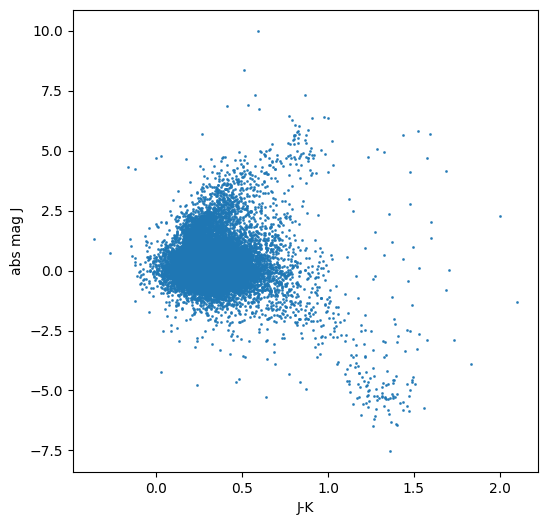

In [178]:
plt.figure(figsize=(6, 6))

plt.scatter(clean_final["J_mag"] - clean_final["K_mag"], clean_final["abs_mag_J"], marker='o', s=1, alpha = 0.85)
plt.xlabel("J-K")
plt.ylabel("abs mag J")
plt.show()

In [180]:
errors = clean_final[((clean_final["distance_high"] - clean_final["distance_low"]) / clean_final["distance"]) < 0.3].copy()
errors

,ASASSN_id,distance,distance_low,distance_high,g_mag,Gaia_name,G_mag,G_mag_err,abs_mag_G,abs_mag_G_low,...,ext_correct_K_low,ext_correct_K_high,FinalType,ML_classifier_type,visual_classification_type,VSX_type,VSX_RA,VSX_Dec,VSX_name,J_minus_K
0,8590948612,3778,3484,4082,13.245,Gaia DR3 2875539776437822592,12.869,0.012,-0.138,0.038,...,0.015,0.015,RRAB,RRL_ab,NaN,RRAB,0.01521,35.36286,GM And,0.336
4,661428842978,4131,3828,4440,14.566,Gaia DR3 2880106185667004928,14.215,0.011,0.796,0.961,...,0.043,0.043,RRAB,RRL_ab,NaN,RRAB,0.09900,36.32870,NSVS 6313844,0.399
7,249108450355,2828,2736,2936,13.397,Gaia DR3 2853512332285518592,13.160,0.010,0.806,0.877,...,0.012,0.012,RRAB,RRL_ab,NaN,RRAB,0.14829,26.66375,GV Peg,0.228
8,111669995433,2382,2316,2472,13.186,Gaia DR3 2880528638650410624,13.047,0.007,0.896,0.957,...,0.034,0.034,RRC,RRL_c,NaN,RRC,0.18471,37.84283,ROTSE1 J000044.33 +375034.2,0.216
11,51540332578,2130,2072,2191,14.293,Gaia DR3 422761499325397120,13.595,0.009,0.984,1.052,...,0.123,0.124,RRAB,RRL_ab,NaN,RRAB,0.27937,58.55164,EW Cas,0.435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25388,137440324131,4474,4150,4908,14.784,Gaia DR3 1945536351631291264,14.641,0.008,1.000,1.163,...,0.050,0.050,RRC,RRL_c,NaN,RRC,359.77146,54.01686,QY Cas,0.323
25389,661428930020,3221,3032,3469,14.135,Gaia DR3 1945532056664053376,14.846,0.006,1.928,2.098,...,0.043,0.059,RRC,RRL_c,NaN,RRC,359.80239,53.94432,PS1-3PI J235912.57+535639.5,0.378
25391,472447133837,4426,4108,4813,16.119,Gaia DR3 2773761352308748032,13.928,0.005,0.698,0.860,...,0.000,0.000,RRC,NonVar,RRC,RRC,359.93546,17.65683,ASAS J235945+1739.5,0.250
25392,283468348278,4310,3755,4843,14.735,Gaia DR3 2422393685595709568,14.706,0.007,1.534,1.833,...,0.000,0.000,RRC,RRL_c,NaN,RRC,359.93652,-11.75557,ASASSN-V J235944.77-114520.0,0.192


In [181]:
#plt.figure(figsize=(6, 6))
#sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=errors, hue="ML_classifier_type", alpha=0.5, s=3, palette="inferno_r")
#plt.gca().invert_yaxis()
#plt.title("Color Magnitude Diagram of Star Types Given by Maching Learning Classifier")
#plt.xlabel("J-K Color")
#plt.ylabel("Absolute Magnitude J")
#plt.legend(title="Machine Learning Classifier Type")

# plt.savefig('test_ml_types.eps', format='eps', dpi=1000)

In [182]:
# Main plot
#plt.figure(figsize=(12, 12))
#scatter_plot = sns.scatterplot(
    #x="J_minus_K", 
    #y="abs_mag_J", 
    #data=errors, 
    #hue="ML_classifier_type", 
    #alpha=0.5, 
    #s=3, 
    #palette="inferno_r"
#)
#plt.gca().invert_yaxis()
#plt.title("Color Magnitude Diagram of Star Types Given by Machine Learning Classifier")
#plt.xlabel("J-K Color")
#plt.ylabel("Absolute Magnitude J")
#plt.legend(title="Machine Learning Classifier Type", loc="lower right")
#plt.xlim(-0.1, 1.6)
#plt.ylim(7, -4)

# Adding an inset
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Define inset location and size
#ax_inset = inset_axes(plt.gca(), width="30%", height="30%", loc="upper right")
#sns.scatterplot(
    #x="J_minus_K", 
    #y="abs_mag_J", 
    #data=errors, 
    #hue="ML_classifier_type", 
    #alpha=0.5, 
    #s=3, 
    #palette="inferno_r", 
    #legend=False, 
    #ax=ax_inset
#)

# Adjust inset axis limits (zoomed area)
#ax_inset.set_xlim(1, 1.6)  # Adjust as needed
#ax_inset.set_ylim(-3, -7)      # Adjust as needed
#ax_inset.invert_yaxis()
#ax_inset.set_xticks(np.arange(1, 1.6, 0.2))
#ax_inset.set_yticks(np.arange(-3, -7, -1)) 
#ax_inset.set_xlabel("J-K Color")
#ax_inset.set_ylabel("Absolute Magnitude J")

# plt.savefig('inset_ml_types_fig.eps', format='eps', dpi=1000)

In [183]:
#plt.figure(figsize=(6, 6))
#sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=eclipsing, hue="ML_classifier_type", alpha=0.6, s=3, palette=["black", "lightgreen", "orange"])
#plt.gca().invert_yaxis()
#plt.show()

In [184]:
#plt.figure(figsize=(6, 6))
#sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=rr_lyrae, hue="ML_classifier_type", hue_order=["RRL_d", "RRL_c", "RRL_ab"], alpha=0.7, palette=["black", "lightgreen", "orange"], s=3)
#plt.gca().invert_yaxis()

#plt.title("Color Magnitude Diagram of RRL Stars Given by Maching Learning Classifier")
#plt.xlabel("J-K Color")
#plt.ylabel("Absolute Magnitude J")
#plt.legend(title="Machine Learning Classifier Type")

# plt.savefig('rrl.eps', format='eps', dpi=1000)

In [213]:
clean_final["FinalType"].unique()

array(['RRAB', 'RRC', 'RR(B)', 'CONSTANT', 'POSSIBLY', "I'D", 'EB', 'EW',
       'BY', 'EA', 'SRA', 'CONST', 'SXPHE', 'RS', 'L', 'SRB', 'NEED',
       'GDOR:', 'DSCT', 'BY:', 'INS', 'GDOR', 'CEP:', 'SR', 'SRD', 'NO',
       'DCEP', 'CWA:', 'CEP', 'COSNTANT', 'RS:', 'CEPH', 'YSO'],
      dtype=object)

In [214]:
clean_final.groupby("FinalType").agg("count").reset_index()

,FinalType,ASASSN_id,distance,distance_low,distance_high,g_mag,Gaia_name,G_mag,G_mag_err,abs_mag_G,...,ext_correct_K,ext_correct_K_low,ext_correct_K_high,ML_classifier_type,visual_classification_type,VSX_type,VSX_RA,VSX_Dec,VSX_name,J_minus_K
0,BY,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
1,BY:,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,CEP,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
3,CEP:,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,CEPH,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
5,CONST,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
6,CONSTANT,257,257,257,257,257,257,257,257,257,...,257,257,257,257,257,257,257,257,257,257
7,COSNTANT,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,CWA:,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9,DCEP,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [188]:
errors.groupby("FinalType").agg("count").reset_index()

,FinalType,ASASSN_id,distance,distance_low,distance_high,g_mag,Gaia_name,G_mag,G_mag_err,abs_mag_G,...,ext_correct_K,ext_correct_K_low,ext_correct_K_high,ML_classifier_type,visual_classification_type,VSX_type,VSX_RA,VSX_Dec,VSX_name,J_minus_K
0,BY,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
1,BY:,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2,CEP,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3,CEPH,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
4,CONST,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
5,CONSTANT,174,174,174,174,174,174,174,174,174,...,174,174,174,174,174,174,174,174,174,174
6,CWA:,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,DCEP,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
8,DSCT,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
9,EA,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82


In [189]:
rr_lyrae_final = errors[(errors["FinalType"] == "RRAB") | (errors["FinalType"] == "RRC") | (errors["FinalType"] == "RR(B)")]
rr_lyrae_final

,ASASSN_id,distance,distance_low,distance_high,g_mag,Gaia_name,G_mag,G_mag_err,abs_mag_G,abs_mag_G_low,...,ext_correct_K_low,ext_correct_K_high,FinalType,ML_classifier_type,visual_classification_type,VSX_type,VSX_RA,VSX_Dec,VSX_name,J_minus_K
0,8590948612,3778,3484,4082,13.245,Gaia DR3 2875539776437822592,12.869,0.012,-0.138,0.038,...,0.015,0.015,RRAB,RRL_ab,NaN,RRAB,0.01521,35.36286,GM And,0.336
4,661428842978,4131,3828,4440,14.566,Gaia DR3 2880106185667004928,14.215,0.011,0.796,0.961,...,0.043,0.043,RRAB,RRL_ab,NaN,RRAB,0.09900,36.32870,NSVS 6313844,0.399
7,249108450355,2828,2736,2936,13.397,Gaia DR3 2853512332285518592,13.160,0.010,0.806,0.877,...,0.012,0.012,RRAB,RRL_ab,NaN,RRAB,0.14829,26.66375,GV Peg,0.228
8,111669995433,2382,2316,2472,13.186,Gaia DR3 2880528638650410624,13.047,0.007,0.896,0.957,...,0.034,0.034,RRC,RRL_c,NaN,RRC,0.18471,37.84283,ROTSE1 J000044.33 +375034.2,0.216
11,51540332578,2130,2072,2191,14.293,Gaia DR3 422761499325397120,13.595,0.009,0.984,1.052,...,0.123,0.124,RRAB,RRL_ab,NaN,RRAB,0.27937,58.55164,EW Cas,0.435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25388,137440324131,4474,4150,4908,14.784,Gaia DR3 1945536351631291264,14.641,0.008,1.000,1.163,...,0.050,0.050,RRC,RRL_c,NaN,RRC,359.77146,54.01686,QY Cas,0.323
25389,661428930020,3221,3032,3469,14.135,Gaia DR3 1945532056664053376,14.846,0.006,1.928,2.098,...,0.043,0.059,RRC,RRL_c,NaN,RRC,359.80239,53.94432,PS1-3PI J235912.57+535639.5,0.378
25391,472447133837,4426,4108,4813,16.119,Gaia DR3 2773761352308748032,13.928,0.005,0.698,0.860,...,0.000,0.000,RRC,NonVar,RRC,RRC,359.93546,17.65683,ASAS J235945+1739.5,0.250
25392,283468348278,4310,3755,4843,14.735,Gaia DR3 2422393685595709568,14.706,0.007,1.534,1.833,...,0.000,0.000,RRC,RRL_c,NaN,RRC,359.93652,-11.75557,ASASSN-V J235944.77-114520.0,0.192


In [217]:
final_data = errors[(errors["FinalType"] == "RRAB") | (errors["FinalType"] == "RRC") | (errors["FinalType"] == "RR(B)") |  (errors["FinalType"] == "EW") | (errors["FinalType"] == "DSCT") | (errors["FinalType"] == "EW") | (errors["FinalType"] == "EA") | (errors["FinalType"] == "EB")] 

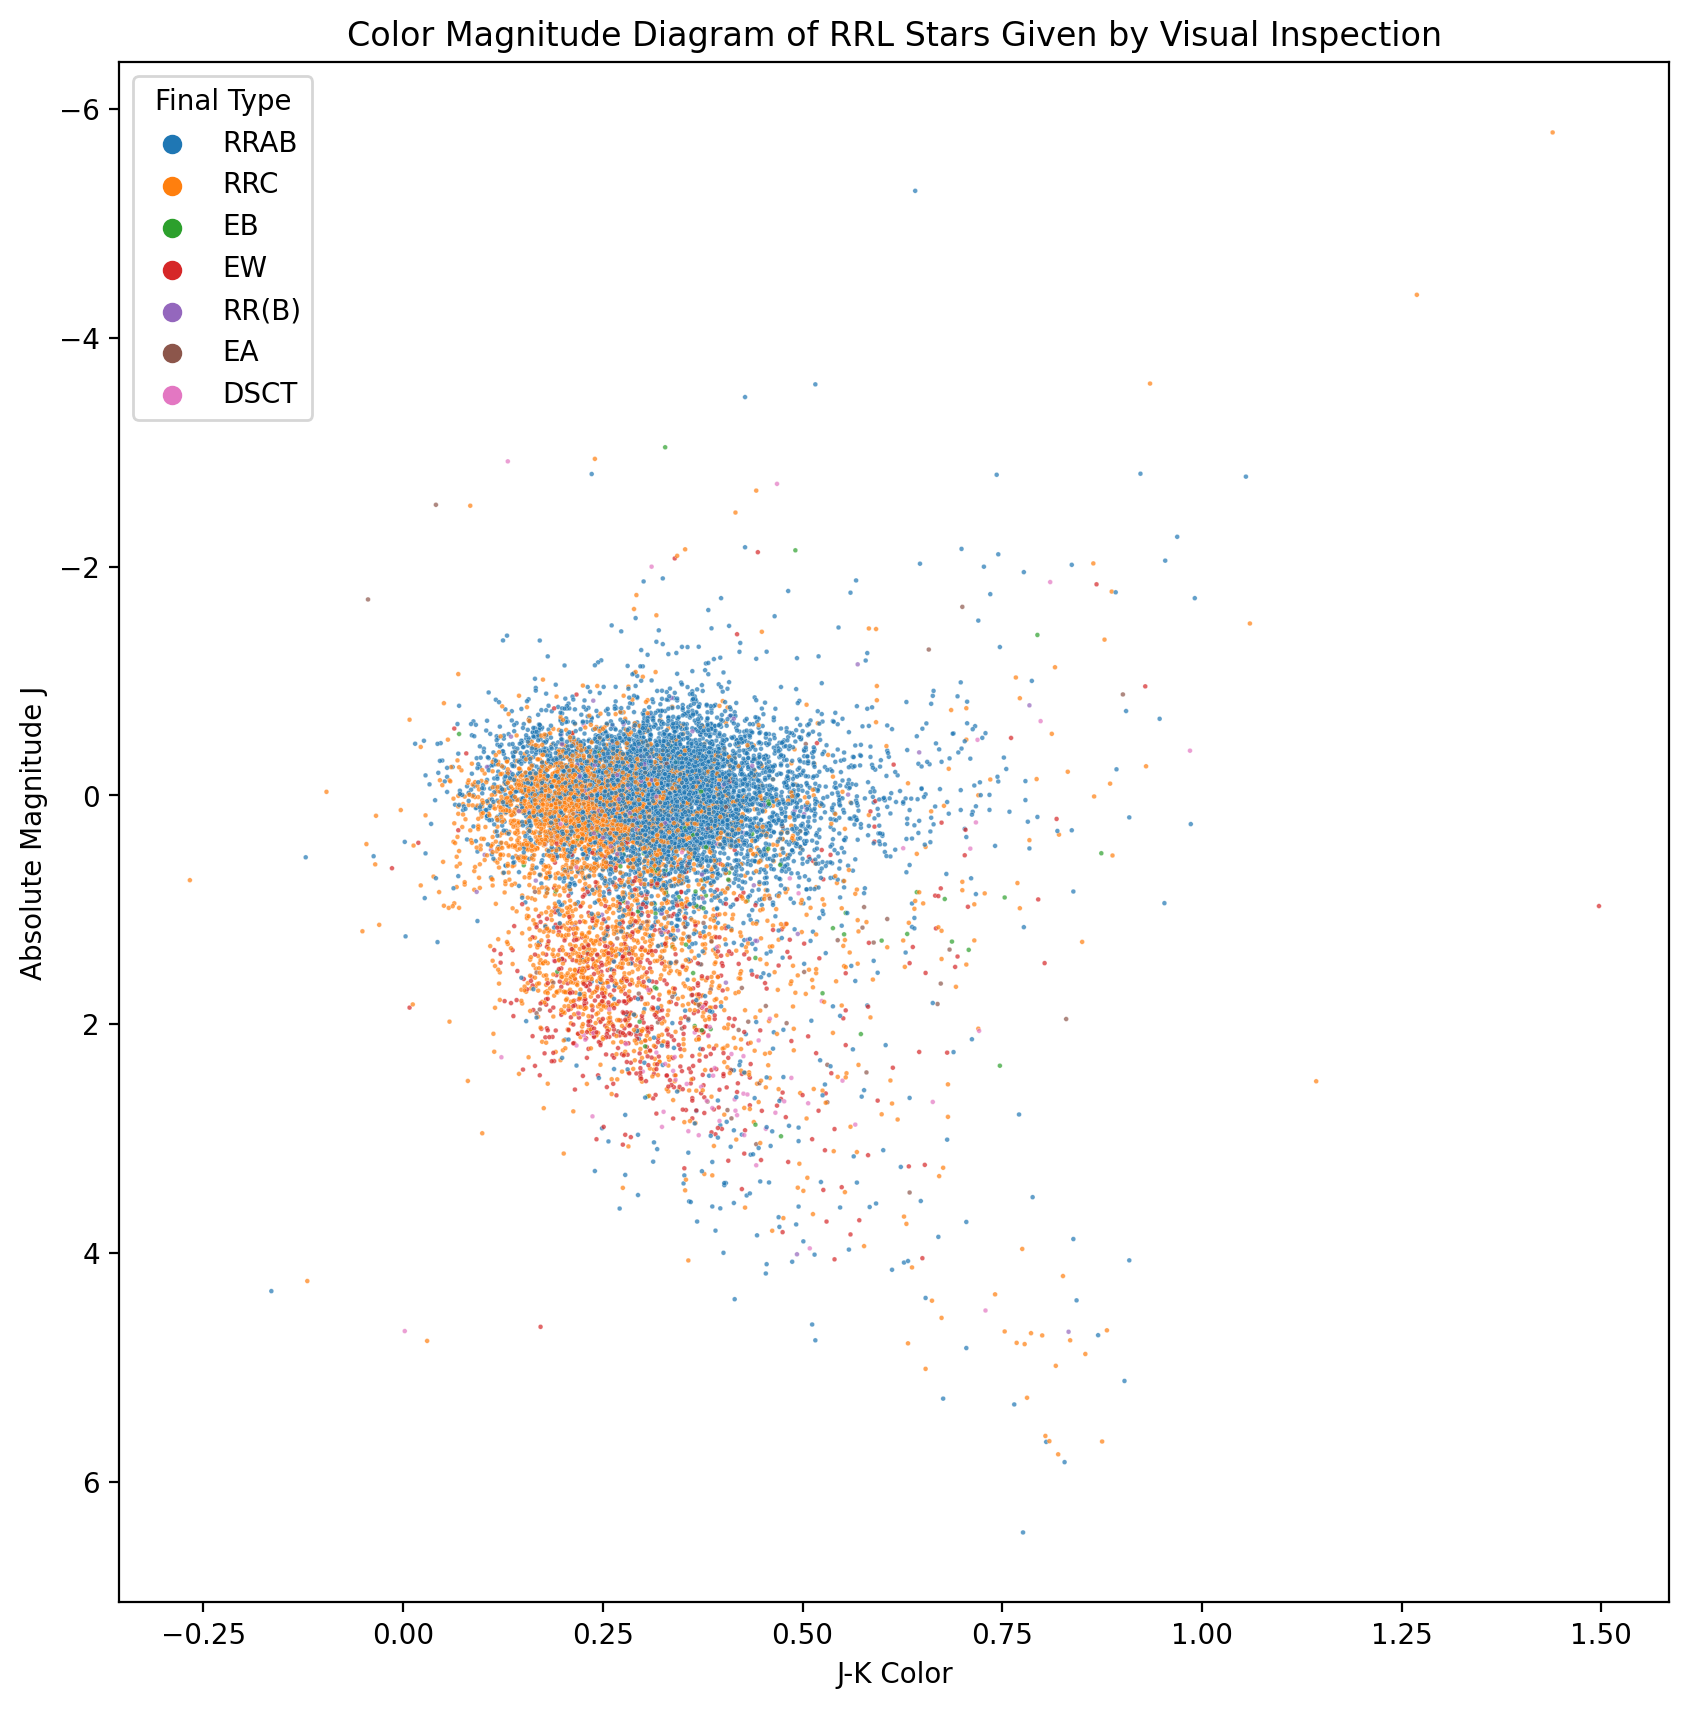

In [218]:
plt.figure(figsize=(10, 10), dpi = 200)
sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=final_data, hue="FinalType", alpha=0.7, s=3)
plt.gca().invert_yaxis()

plt.title("Color Magnitude Diagram of RRL Stars Given by Visual Inspection")
plt.xlabel("J-K Color")
plt.ylabel("Absolute Magnitude J")
plt.legend(title="Final Type")

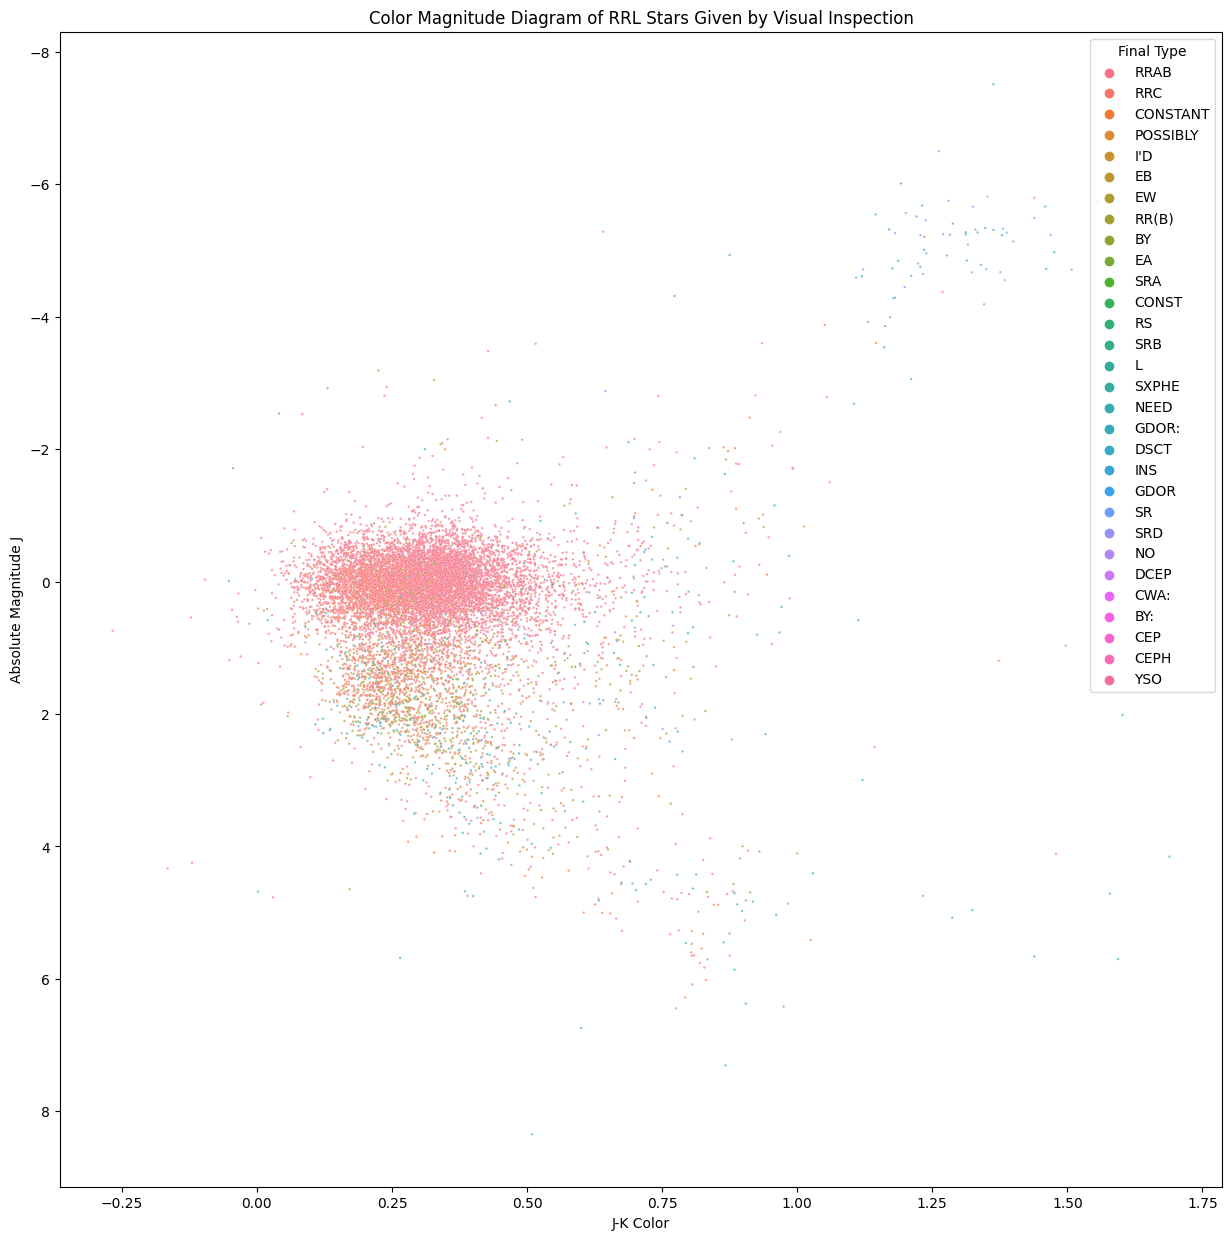

In [192]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=errors, hue="FinalType", alpha=0.7, s=3)
plt.gca().invert_yaxis()

plt.title("Color Magnitude Diagram of RRL Stars Given by Visual Inspection")
plt.xlabel("J-K Color")
plt.ylabel("Absolute Magnitude J")
plt.legend(title="Final Type")

In [193]:
# Error calculations
errors['J-K'] = errors['J_mag'] - errors['K_mag']
errors['J-K_err'] = np.sqrt(errors['J_mag_err']**2 + errors['K_mag_err']**2)

# Distance uncertainty calculation
errors['sigma_distance'] = (errors['distance_high'] - errors['distance_low']) / 2
errors['sigma_dist_term'] = (5/np.log(10)) * (errors['sigma_distance']/errors['distance'])

# Calculate E(B-V) using extinction corrections
R_J = 0.91  # From Yuan et al. 2013
R_K = 0.39

# Derive E(B-V) from extinction corrections
errors['E(B-V)'] = errors['ext_correct_J'] / R_J  # A_J = R_J * E(B-V) => E(B-V) = A_J/R_J

# Now calculate A_J and E(J-K) safely
errors['A_J'] = R_J * errors['E(B-V)']
errors['E(J-K)'] = (R_J - R_K) * errors['E(B-V)']

# Absolute magnitude calculation with error propagation
errors['abs_mag_J'] = (errors['J_mag'] 
                      - 5 * np.log10(errors['distance']) 
                      + 5 
                      - errors['A_J'])
errors['abs_mag_J_err'] = np.sqrt(
    errors['J_mag_err']**2 + 
    errors['sigma_dist_term']**2 + 
    (R_J * 0.1 * errors['E(B-V)'])**2  # Assuming 10% error in E(B-V)
)

# Quality cuts
filtered = errors[
    (errors['J-K_err'] < 0.05) &
    (errors['abs_mag_J_err'] < 0.15) &
    (errors['E(J-K)'] < 0.1) &
    (errors['A_J'] < 1.5)
]

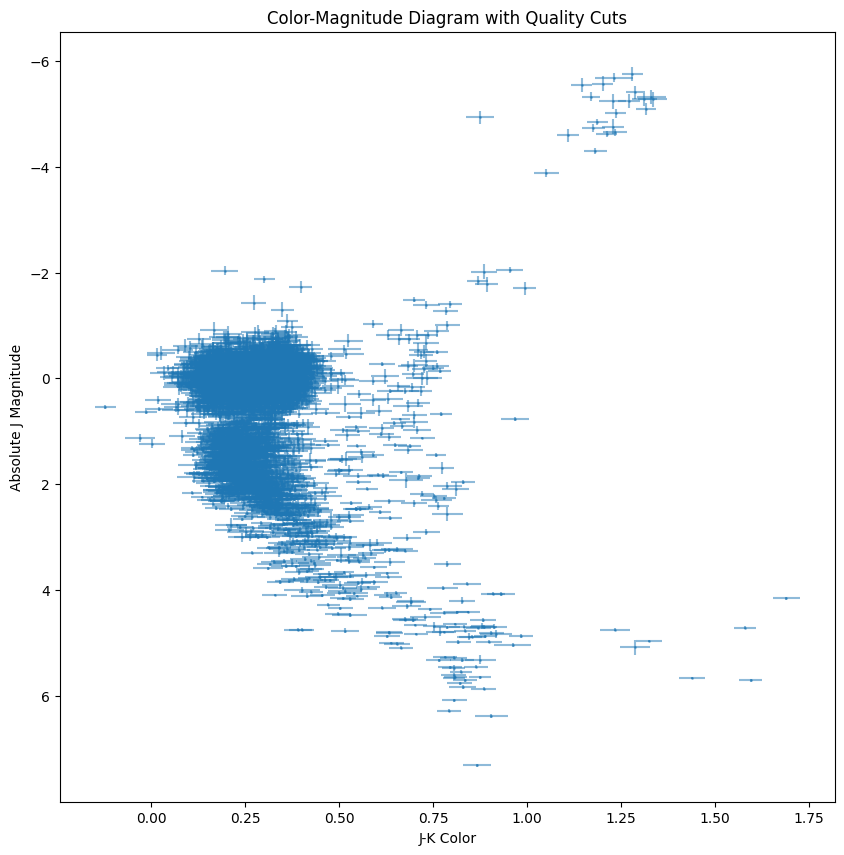

In [194]:
# Plotting
plt.figure(figsize=(10, 10))
plt.errorbar(x = filtered['J-K'], y = filtered['abs_mag_J'], xerr=filtered['J-K_err'], yerr=filtered['abs_mag_J_err'], fmt='.', markersize=2, alpha=0.5)
plt.gca().invert_yaxis()
plt.xlabel('J-K Color')
plt.ylabel('Absolute J Magnitude')
plt.title('Color-Magnitude Diagram with Quality Cuts')
plt.show()

In [ ]:
# Remove unwanted FinalTypes
unwanted_types = ["CWA:", "NEED", "NO", "BY:", "GDOR:", "SRA", "CONSTANT", "GDOR", "DCEP", "CEP", "CEPH", "SR", "SRD", "RS", "L", "BY", "SXPHE"]
filtered = filtered[~filtered["FinalType"].isin(unwanted_types)]

# Merge 'CONST' into 'CONSTANT'
filtered["FinalType"] = filtered["FinalType"].replace("CONST", "CONSTANT")

In [196]:
filtered['FinalType'].unique()

array(['RRAB', 'RRC', 'EW', 'EB', 'EA', 'RR(B)', 'CONSTANT', 'DSCT'],
      dtype=object)

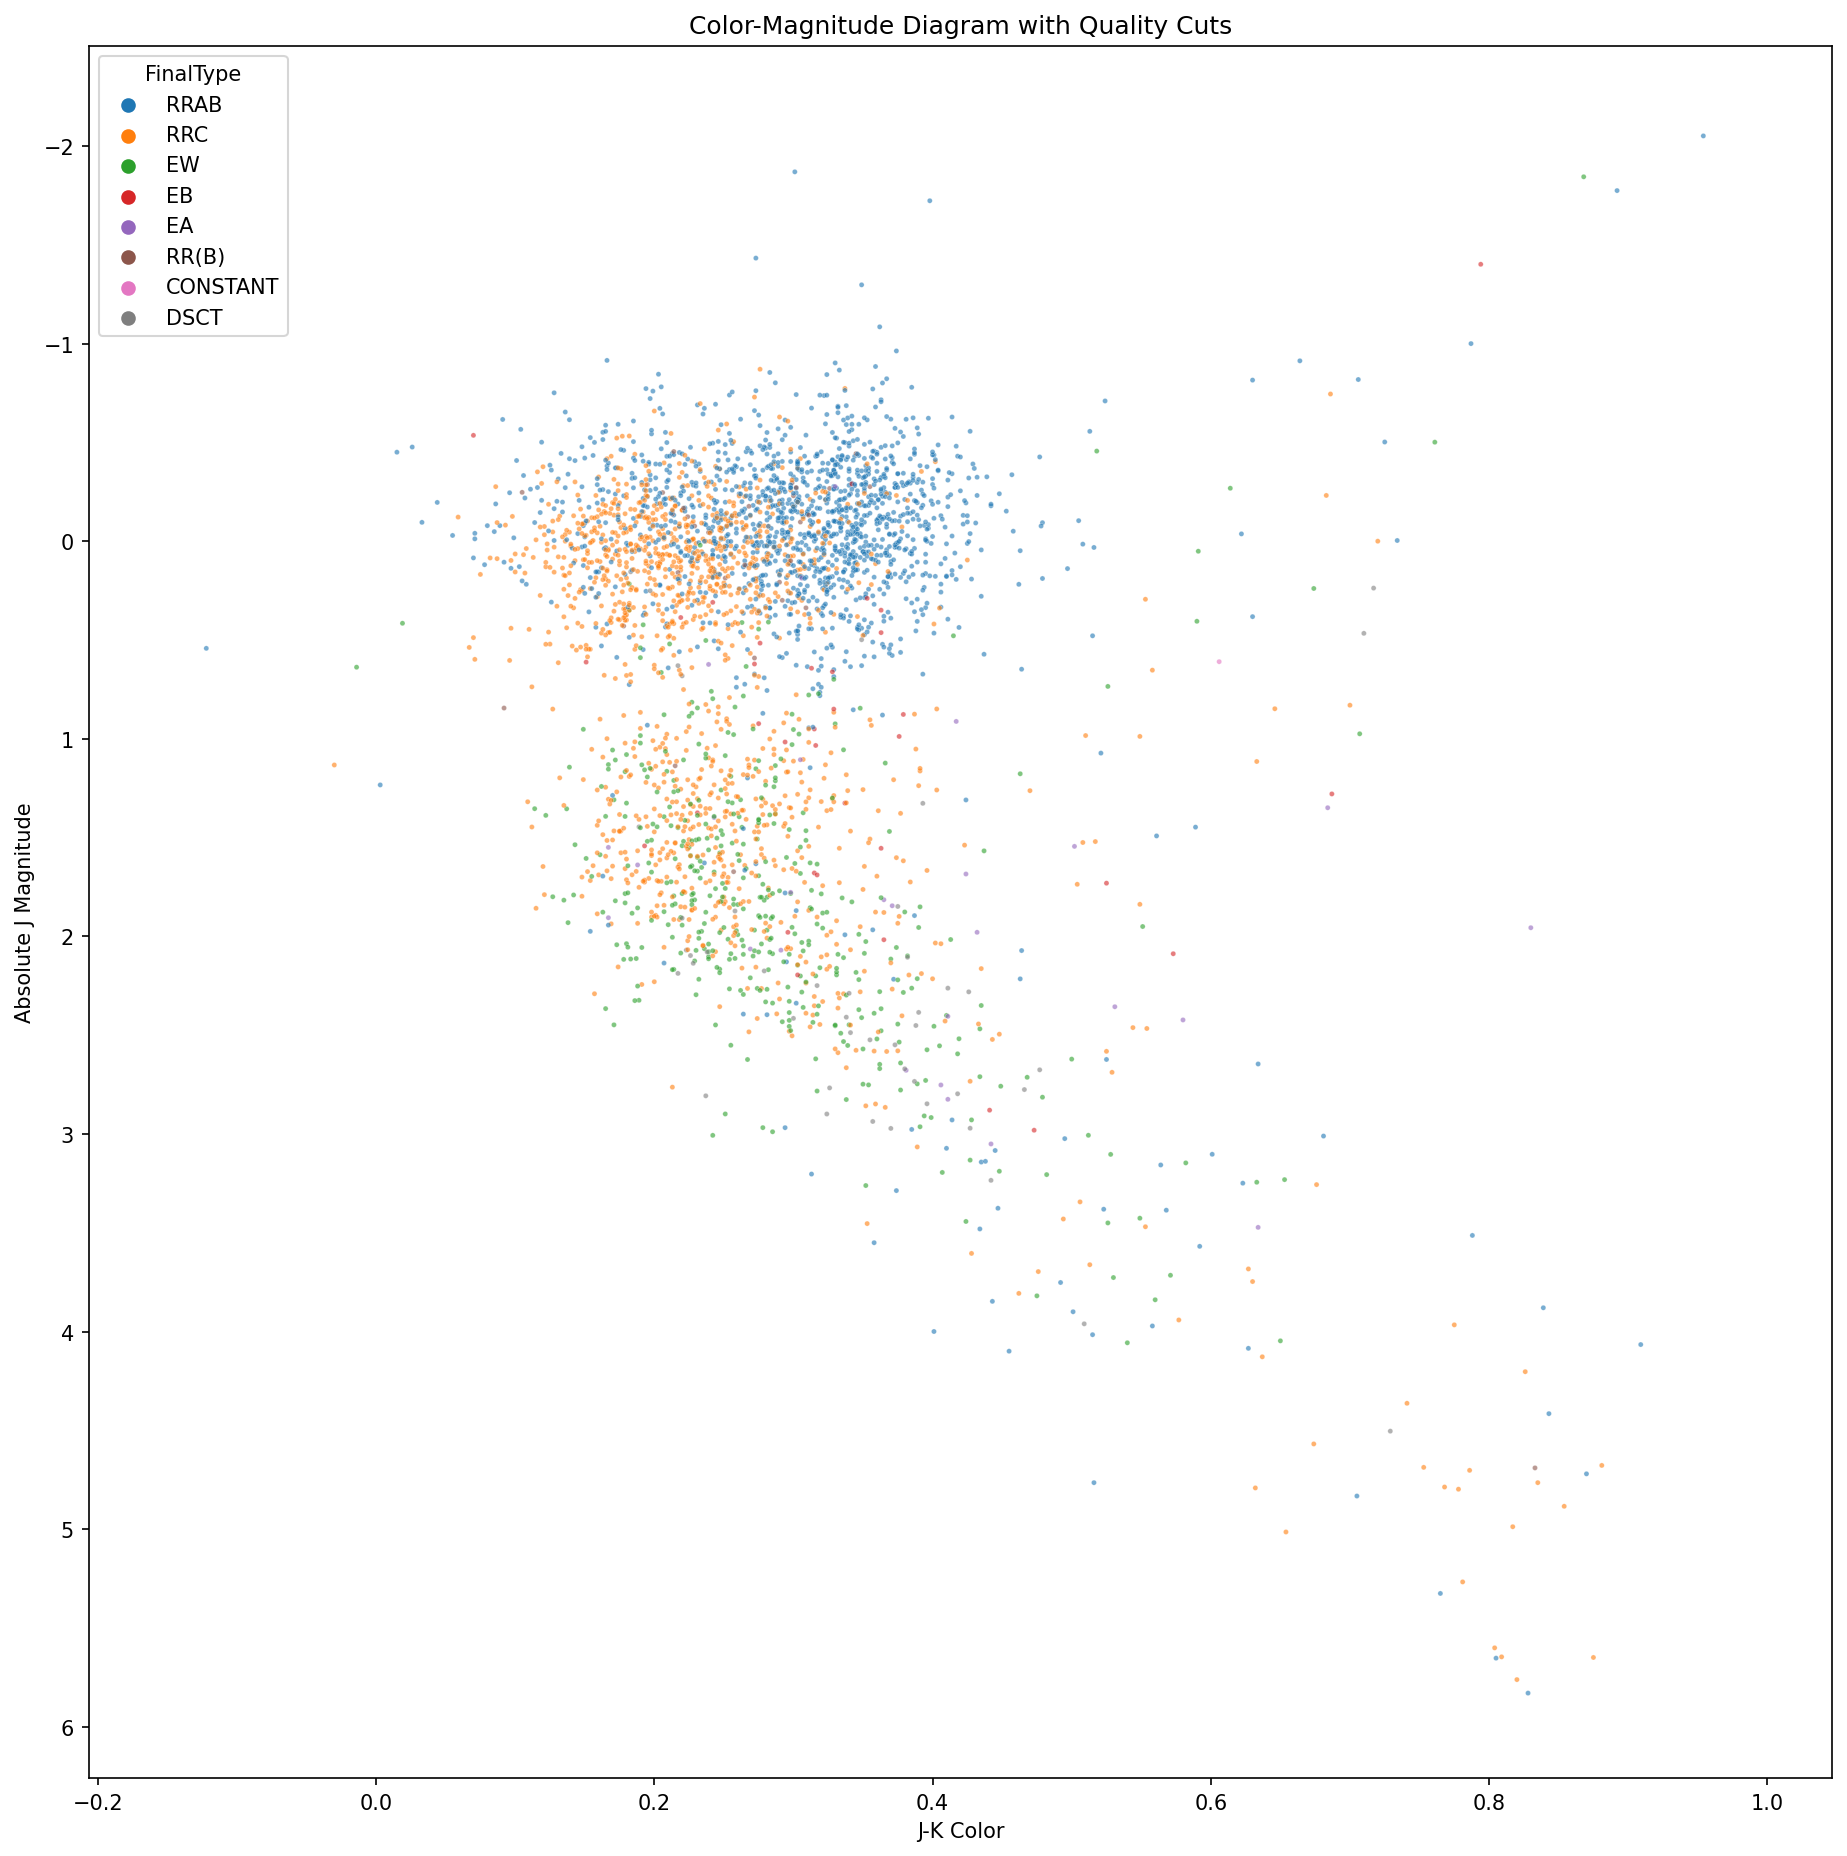

In [197]:
# Plotting
plt.figure(figsize=(15, 15), dpi = 150)
plt.errorbar(
    x=filtered['J-K'], 
    y=filtered['abs_mag_J'], 
    xerr=filtered['J-K_err'], 
    yerr=filtered['abs_mag_J_err'], 
    fmt='none', 
    ecolor='gray', 
    alpha=0
)
sns.scatterplot(
    data=filtered,
    x='J-K',
    y='abs_mag_J',
    hue='FinalType',
    s=6,
    alpha=0.6,
)
plt.gca().invert_yaxis()
plt.xlabel('J-K Color')
plt.ylabel('Absolute J Magnitude')
plt.title('Color-Magnitude Diagram with Quality Cuts')
plt.show()


In [198]:
errors

,ASASSN_id,distance,distance_low,distance_high,g_mag,Gaia_name,G_mag,G_mag_err,abs_mag_G,abs_mag_G_low,...,VSX_name,J_minus_K,J-K,J-K_err,sigma_distance,sigma_dist_term,E(B-V),A_J,E(J-K),abs_mag_J_err
0,8590948612,3778,3484,4082,13.245,Gaia DR3 2875539776437822592,12.869,0.012,-0.138,0.038,...,GM And,0.336,0.336,0.031828,299.0,0.171856,0.039560,0.036,0.020571,0.173295
4,661428842978,4131,3828,4440,14.566,Gaia DR3 2880106185667004928,14.215,0.011,0.796,0.961,...,NSVS 6313844,0.399,0.399,0.041110,306.0,0.160850,0.110989,0.101,0.057714,0.164121
7,249108450355,2828,2736,2936,13.397,Gaia DR3 2853512332285518592,13.160,0.010,0.806,0.877,...,GV Peg,0.228,0.228,0.030414,100.0,0.076785,0.031868,0.029,0.016571,0.079927
8,111669995433,2382,2316,2472,13.186,Gaia DR3 2880528638650410624,13.047,0.007,0.896,0.957,...,ROTSE1 J000044.33 +375034.2,0.216,0.216,0.031145,78.0,0.071106,0.087912,0.080,0.045714,0.075160
11,51540332578,2130,2072,2191,14.293,Gaia DR3 422761499325397120,13.595,0.009,0.984,1.052,...,EW Cas,0.435,0.435,0.033601,59.5,0.060659,0.317582,0.289,0.165143,0.072413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25388,137440324131,4474,4150,4908,14.784,Gaia DR3 1945536351631291264,14.641,0.008,1.000,1.163,...,QY Cas,0.323,0.323,0.045804,379.0,0.183949,0.127473,0.116,0.066286,0.186282
25389,661428930020,3221,3032,3469,14.135,Gaia DR3 1945532056664053376,14.846,0.006,1.928,2.098,...,PS1-3PI J235912.57+535639.5,0.378,0.378,0.044204,218.5,0.147304,0.124176,0.113,0.064571,0.150184
25391,472447133837,4426,4108,4813,16.119,Gaia DR3 2773761352308748032,13.928,0.005,0.698,0.860,...,ASAS J235945+1739.5,0.250,0.250,0.039825,352.5,0.172943,0.000000,0.000,0.000000,0.174740
25392,283468348278,4310,3755,4843,14.735,Gaia DR3 2422393685595709568,14.706,0.007,1.534,1.833,...,ASASSN-V J235944.77-114520.0,0.192,0.192,0.062169,544.0,0.274079,0.000000,0.000,0.000000,0.275406


In [199]:
rrl_ab = filtered[filtered["ML_classifier_type"] == "RRL_ab"]
rrl_c = filtered[filtered["ML_classifier_type"] == "RRL_c"]
nonvar = filtered[filtered["ML_classifier_type"] == "NonVar"]
eb_ec = filtered[filtered["ML_classifier_type"] == "EB_EC"]
rrl_e = filtered[filtered["ML_classifier_type"] == "RRL_e"]
dsct = filtered[filtered["ML_classifier_type"] == "DSCT"]
eb_ed = filtered[filtered["ML_classifier_type"] == "EB_ED"]
eb_esd = filtered[filtered["ML_classifier_type"] == "EB_ESD"]
rrl_d = filtered[filtered["ML_classifier_type"] == "RRL_d"]

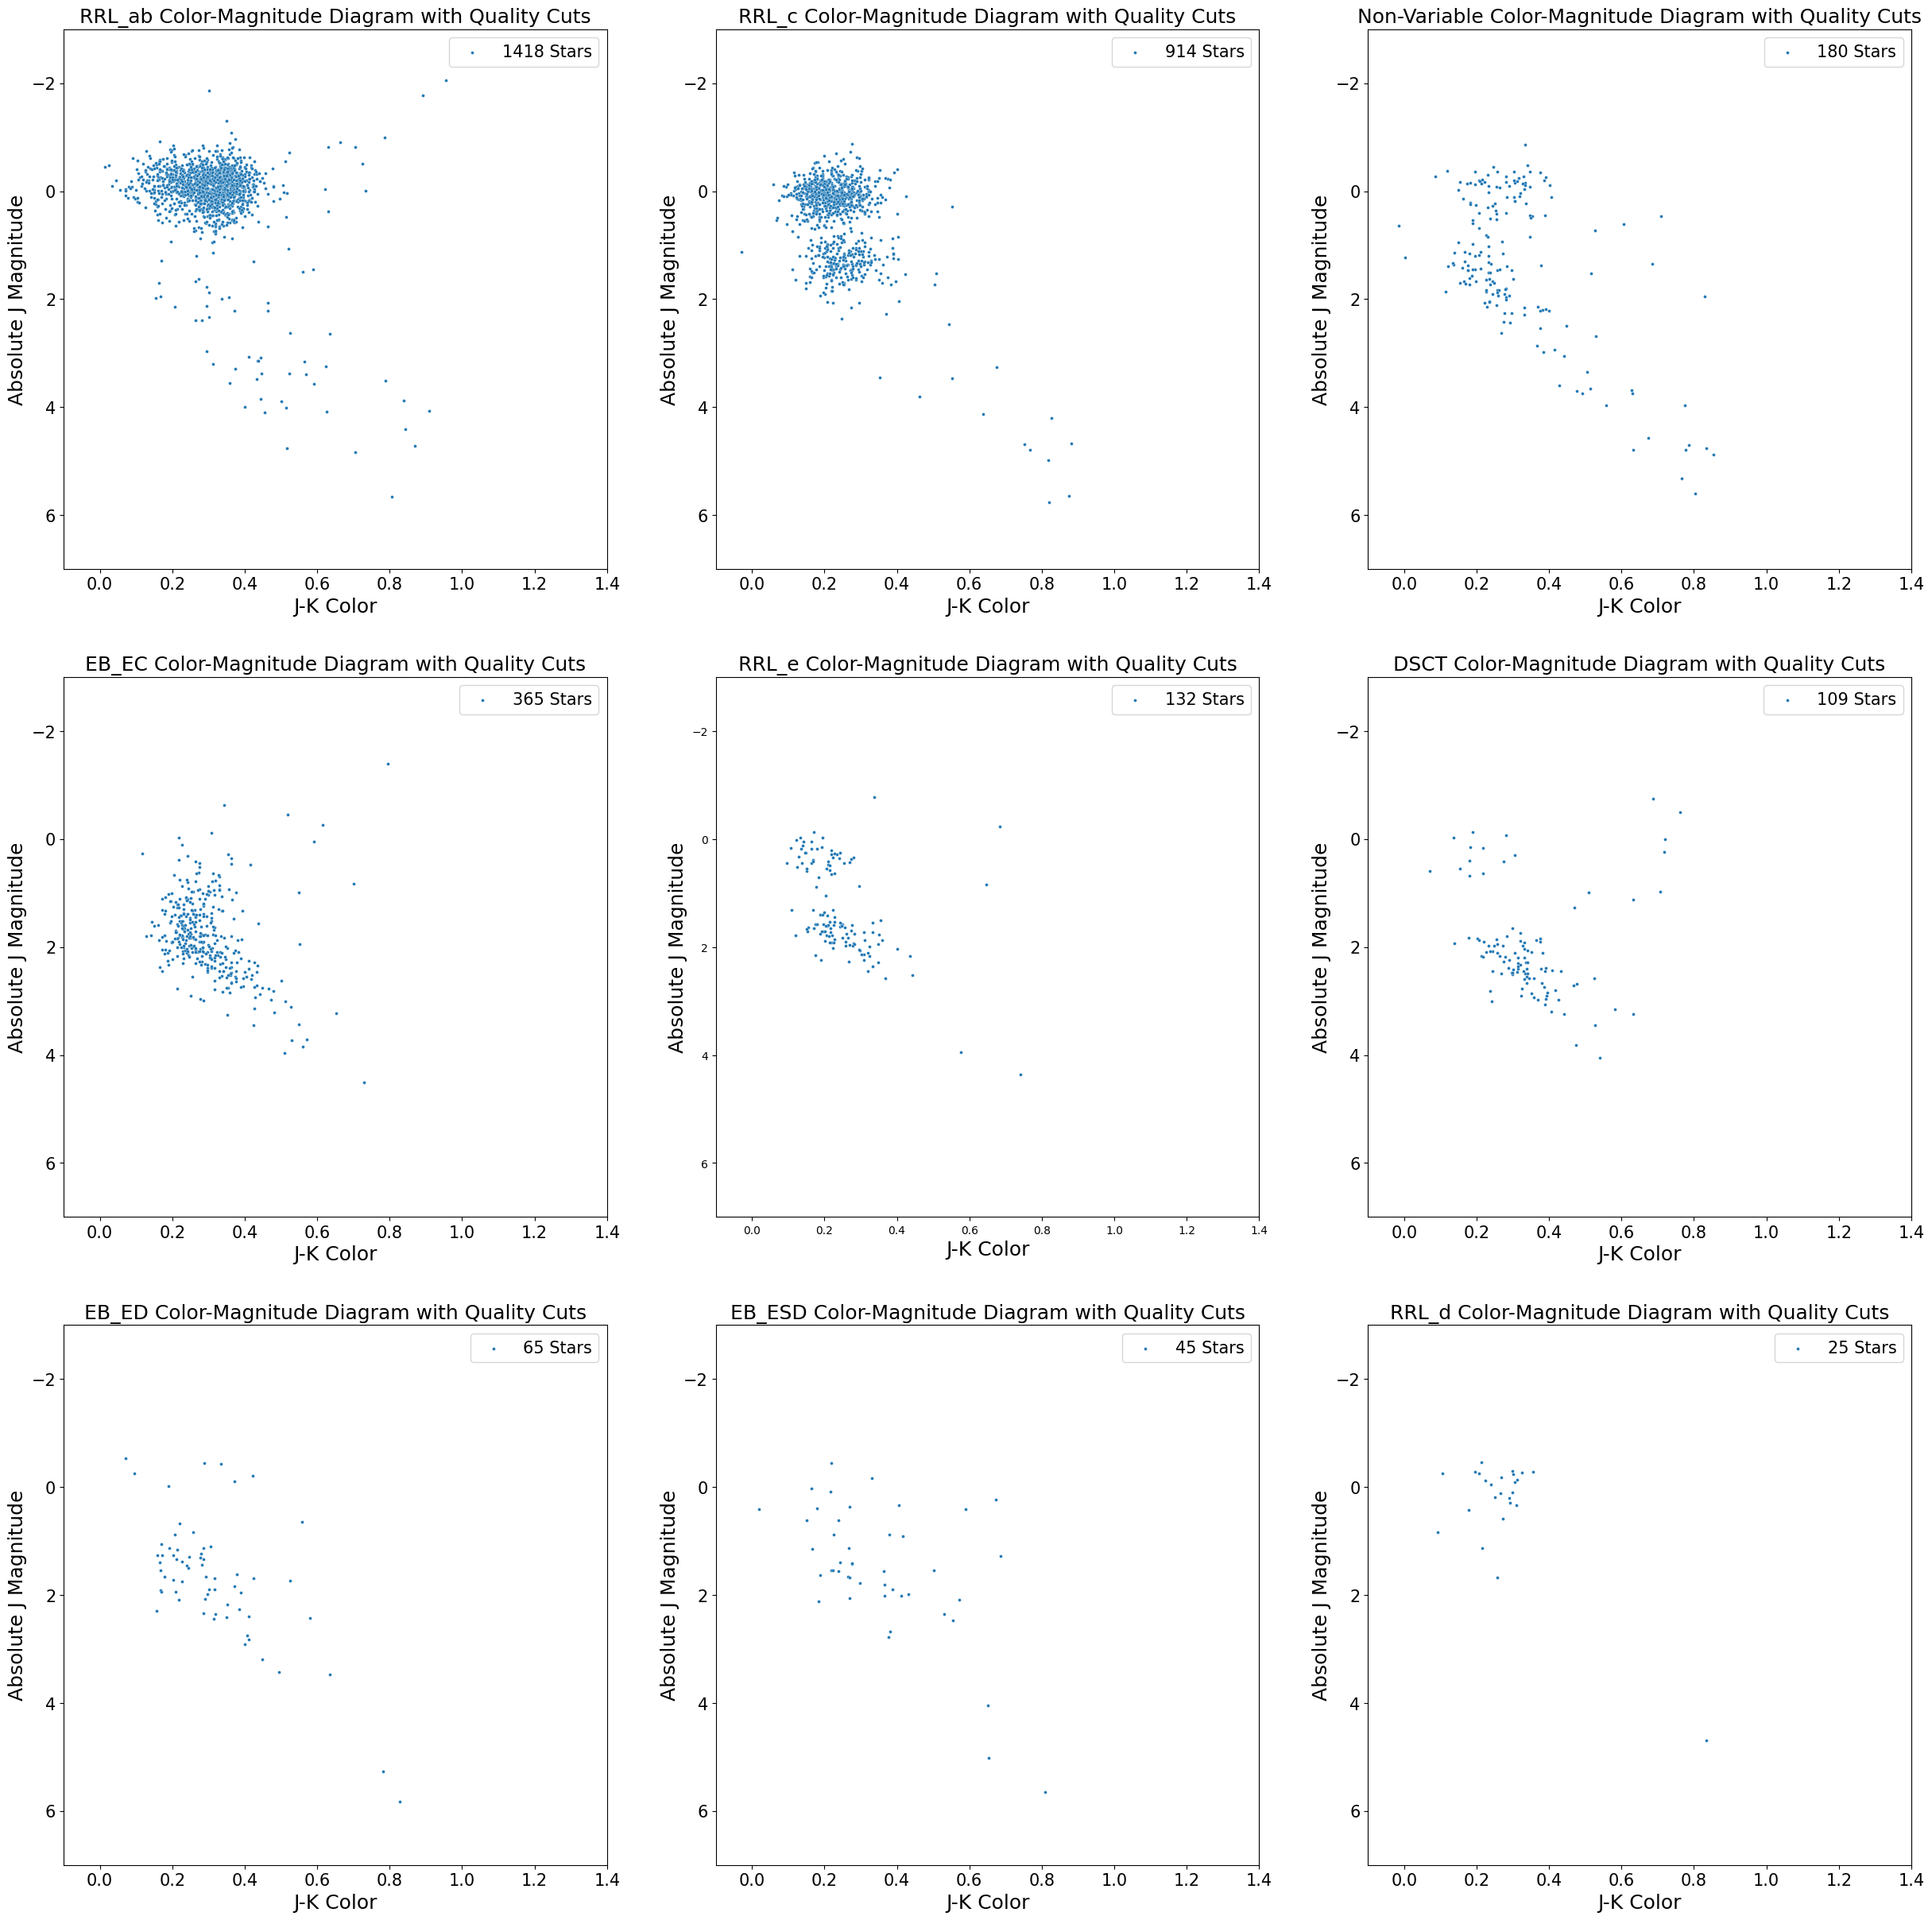

In [200]:
# Plotting
fig = plt.figure(figsize=(30, 30))

ax1 = fig.add_subplot(331)
sns.scatterplot(data=rrl_ab, x='J-K', y='abs_mag_J', s=8, label = f"{len(rrl_ab)} Stars")
ax1.invert_yaxis()
ax1.set_xlabel('J-K Color', size=18)
ax1.set_ylabel('Absolute J Magnitude', size=18)
ax1.set_title('RRL_ab Color-Magnitude Diagram with Quality Cuts', size=18)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.legend(fontsize=15)
ax1.set_xlim(-0.1, 1.4)
ax1.set_ylim(7, -3)

ax2 = fig.add_subplot(332)
sns.scatterplot(data=rrl_c, x='J-K', y='abs_mag_J', s=8, label = f"{len(rrl_c)} Stars")
ax2.invert_yaxis()
ax2.set_xlabel('J-K Color', size=18)
ax2.set_ylabel('Absolute J Magnitude', size=18)
ax2.set_title('RRL_c Color-Magnitude Diagram with Quality Cuts', size=18)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.legend(fontsize=15)
ax2.set_xlim(-0.1, 1.4)
ax2.set_ylim(7, -3)

ax3 = fig.add_subplot(333)
sns.scatterplot(data=nonvar, x='J-K', y='abs_mag_J', s=8, label = f"{len(nonvar)} Stars")
ax3.invert_yaxis()
ax3.set_xlabel('J-K Color', size=18)
ax3.set_ylabel('Absolute J Magnitude', size=18)
ax3.set_title('Non-Variable Color-Magnitude Diagram with Quality Cuts', size=18)
ax3.tick_params(axis='both', which='major', labelsize=15)
ax3.legend(fontsize=15)
ax3.set_xlim(-0.1, 1.4)
ax3.set_ylim(7, -3)

ax4 = fig.add_subplot(334)
sns.scatterplot(data=eb_ec, x='J-K', y='abs_mag_J', s=8, label = f"{len(eb_ec)} Stars")
ax4.invert_yaxis()
ax4.set_xlabel('J-K Color', size=18)
ax4.set_ylabel('Absolute J Magnitude', size=18)
ax4.set_title('EB_EC Color-Magnitude Diagram with Quality Cuts', size=18)
ax4.tick_params(axis='both', which='major', labelsize=15)
ax4.legend(fontsize=15)
ax4.set_xlim(-0.1, 1.4)
ax4.set_ylim(7, -3)

ax5 = fig.add_subplot(335)
sns.scatterplot(data=rrl_e, x='J-K', y='abs_mag_J', s=8, label = f"{len(rrl_e)} Stars")
ax5.invert_yaxis()
ax5.set_xlabel('J-K Color', size=18)
ax5.set_ylabel('Absolute J Magnitude', size=18)
ax5.set_title('RRL_e Color-Magnitude Diagram with Quality Cuts', size=18)
ax5.legend(fontsize=15)
ax5.set_xlim(-0.1, 1.4)
ax5.set_ylim(7, -3)

ax6 = fig.add_subplot(336)
sns.scatterplot(data=dsct, x='J-K', y='abs_mag_J', s=8, label = f"{len(dsct)} Stars")
ax6.invert_yaxis()
ax6.set_xlabel('J-K Color', size=18)
ax6.set_ylabel('Absolute J Magnitude', size=18)
ax6.set_title('DSCT Color-Magnitude Diagram with Quality Cuts', size=18)
ax6.tick_params(axis='both', which='major', labelsize=15)
ax6.legend(fontsize=15)
ax6.set_xlim(-0.1, 1.4)
ax6.set_ylim(7, -3)

ax7 = fig.add_subplot(337)
sns.scatterplot(data=eb_ed, x='J-K', y='abs_mag_J', s=8, label = f"{len(eb_ed)} Stars")
ax7.invert_yaxis()
ax7.set_xlabel('J-K Color', size=18)
ax7.set_ylabel('Absolute J Magnitude', size=18)
ax7.set_title('EB_ED Color-Magnitude Diagram with Quality Cuts', size=18)
ax7.tick_params(axis='both', which='major', labelsize=15)
ax7.legend(fontsize=15)
ax7.set_xlim(-0.1, 1.4)
ax7.set_ylim(7, -3)

ax8 = fig.add_subplot(338)
sns.scatterplot(data=eb_esd, x='J-K', y='abs_mag_J', s=8, label = f"{len(eb_esd)} Stars")
ax8.invert_yaxis()
ax8.set_xlabel('J-K Color', size=18)
ax8.set_ylabel('Absolute J Magnitude', size=18)
ax8.set_title('EB_ESD Color-Magnitude Diagram with Quality Cuts', size=18)
ax8.tick_params(axis='both', which='major', labelsize=15)
ax8.legend(fontsize=15)
ax8.set_xlim(-0.1, 1.4)
ax8.set_ylim(7, -3)

ax9 = fig.add_subplot(339)
sns.scatterplot(data=rrl_d, x='J-K', y='abs_mag_J', s=8, label = f"{len(rrl_d)} Stars")
ax9.invert_yaxis()
ax9.set_xlabel('J-K Color', size=18)
ax9.set_ylabel('Absolute J Magnitude', size=18)
ax9.set_title('RRL_d Color-Magnitude Diagram with Quality Cuts', size=18)
ax9.tick_params(axis='both', which='major', labelsize=15)
ax9.legend(fontsize=15)
ax9.set_xlim(-0.1, 1.4)
ax9.set_ylim(7, -3)

plt.show()

In [201]:
filtered['FinalType'].unique()

array(['RRAB', 'RRC', 'EW', 'EB', 'EA', 'RR(B)', 'CONSTANT', 'DSCT'],
      dtype=object)

In [202]:
rrl_ab = filtered[filtered["FinalType"] == "RRAB"]
rrl_c = filtered[filtered["FinalType"] == "RRC"]
eb_ec = filtered[(filtered["FinalType"] == "EW") | (filtered["FinalType"] == "EB") | (filtered["FinalType"] == "EA)")]
rrl_e = filtered[filtered["FinalType"] == "RR(B)"]

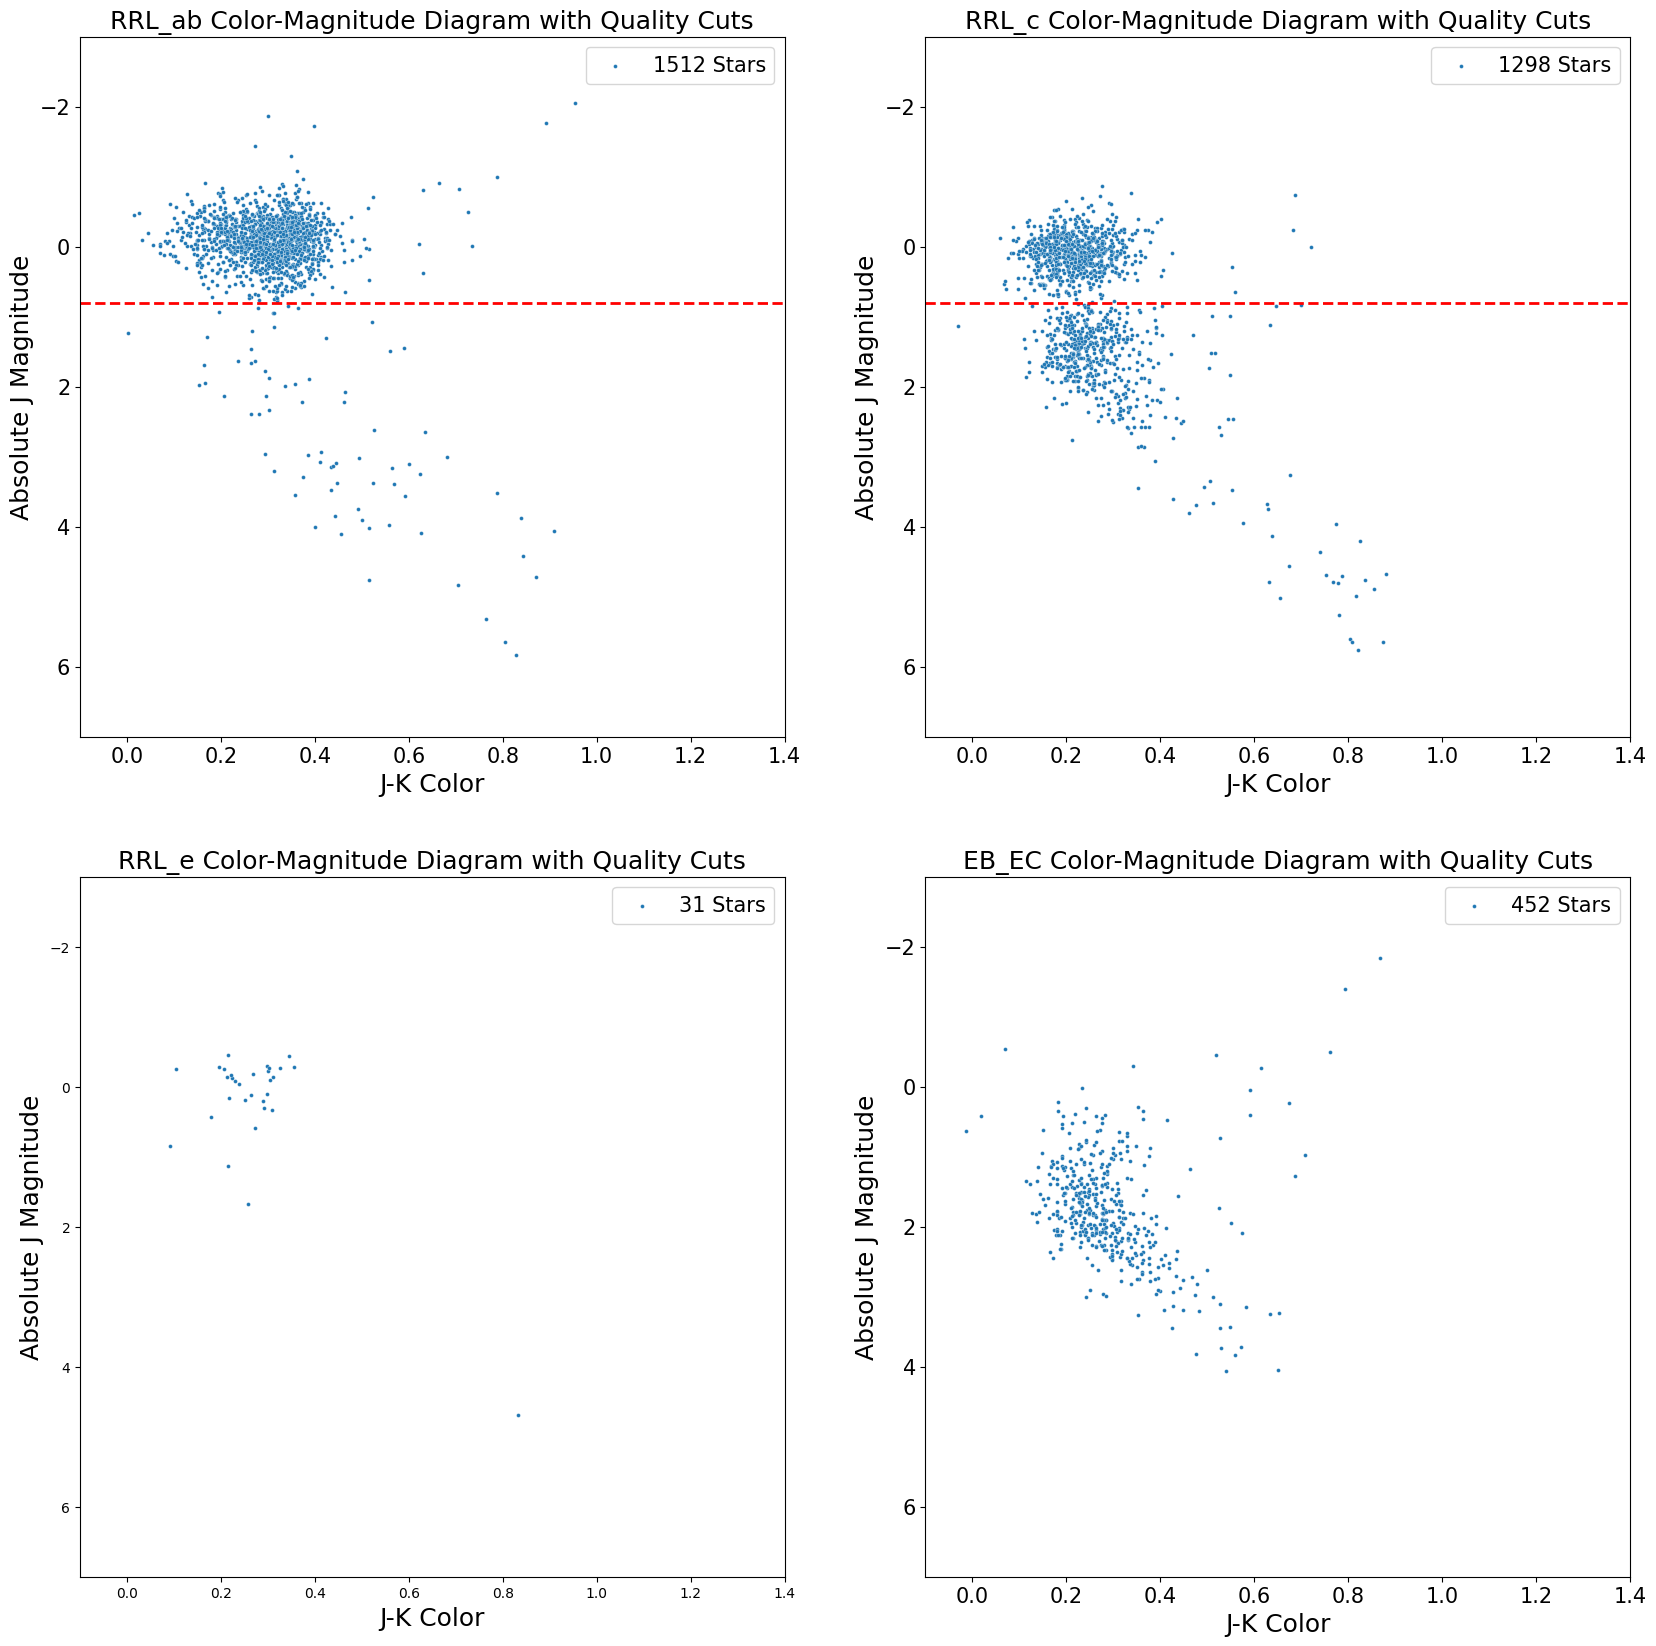

In [203]:
# Plotting
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(221)
sns.scatterplot(data=rrl_ab, x='J-K', y='abs_mag_J', s=8, label = f"{len(rrl_ab)} Stars")
ax1.invert_yaxis()
ax1.set_xlabel('J-K Color', size=18)
ax1.set_ylabel('Absolute J Magnitude', size=18)
ax1.set_title('RRL_ab Color-Magnitude Diagram with Quality Cuts', size=18)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.axhline(y=0.8, color='red', linestyle='--', linewidth=2)
ax1.legend(fontsize=15)
ax1.set_xlim(-0.1, 1.4)
ax1.set_ylim(7, -3)

ax2 = fig.add_subplot(222)
sns.scatterplot(data=rrl_c, x='J-K', y='abs_mag_J', s=8, label = f"{len(rrl_c)} Stars")
ax2.invert_yaxis()
ax2.set_xlabel('J-K Color', size=18)
ax2.set_ylabel('Absolute J Magnitude', size=18)
ax2.set_title('RRL_c Color-Magnitude Diagram with Quality Cuts', size=18)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.axhline(y=0.8, color='red', linestyle='--', linewidth=2)
ax2.legend(fontsize=15)
ax2.set_xlim(-0.1, 1.4)
ax2.set_ylim(7, -3)

ax5 = fig.add_subplot(223)
sns.scatterplot(data=rrl_e, x='J-K', y='abs_mag_J', s=8, label = f"{len(rrl_e)} Stars")
ax5.invert_yaxis()
ax5.set_xlabel('J-K Color', size=18)
ax5.set_ylabel('Absolute J Magnitude', size=18)
ax5.set_title('RRL_e Color-Magnitude Diagram with Quality Cuts', size=18)
ax5.legend(fontsize=15)
ax5.set_xlim(-0.1, 1.4)
ax5.set_ylim(7, -3)

ax4 = fig.add_subplot(224)
sns.scatterplot(data=eb_ec, x='J-K', y='abs_mag_J', s=8, label = f"{len(eb_ec)} Stars")
ax4.invert_yaxis()
ax4.set_xlabel('J-K Color', size=18)
ax4.set_ylabel('Absolute J Magnitude', size=18)
ax4.set_title('EB_EC Color-Magnitude Diagram with Quality Cuts', size=18)
ax4.tick_params(axis='both', which='major', labelsize=15)
ax4.legend(fontsize=15)
ax4.set_xlim(-0.1, 1.4)
ax4.set_ylim(7, -3)

plt.show()

In [204]:
rr_mask = filtered["FinalType"].isin(["RRAB", "RRC"]) & (filtered["abs_mag_J"] > 0.8)
rr_bright_list = filtered[rr_mask]
rr_bright_list

,ASASSN_id,distance,distance_low,distance_high,g_mag,Gaia_name,G_mag,G_mag_err,abs_mag_G,abs_mag_G_low,...,VSX_name,J_minus_K,J-K,J-K_err,sigma_distance,sigma_dist_term,E(B-V),A_J,E(J-K),abs_mag_J_err
35,120260247366,634,625,640,14.093,Gaia DR3 384958644592311040,13.990,0.003,4.762,4.793,...,CSS_J000427.4+440349,0.358,0.358,0.038210,7.5,0.025688,0.071429,0.065,0.037143,0.037123
70,549756977370,745,733,757,11.637,Gaia DR3 2335666854095904896,11.383,0.003,2.022,2.057,...,ASASSN-V J001026.66-245801.2,0.246,0.246,0.029069,12.0,0.034977,0.000000,0.000,0.000000,0.041320
76,214748600537,335,334,338,9.829,Gaia DR3 2798428345921128832,9.775,0.003,2.102,2.108,...,ASAS J001131+1939.6,0.239,0.239,0.032202,2.0,0.012964,0.015385,0.014,0.008000,0.029087
93,171799218028,2537,2405,2647,14.547,Gaia DR3 2800636852464997248,14.336,0.004,2.217,2.333,...,CSS_J001505.0+224800,0.189,0.189,0.048877,121.0,0.103566,0.031868,0.029,0.016571,0.106581
102,377957596435,1026,1012,1042,12.501,Gaia DR3 2793913712522910592,12.403,0.005,2.299,2.329,...,ASAS J001658+1801.7,0.189,0.189,0.030480,15.0,0.031747,0.015385,0.014,0.008000,0.039228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25223,420907501725,661,651,676,12.041,Gaia DR3 6537919614494967808,11.853,0.006,2.714,2.747,...,ASAS J233858-3830.3,0.229,0.229,0.033422,12.5,0.041064,0.012088,0.011,0.006286,0.048616
25256,197569271697,395,391,399,10.906,Gaia DR3 2823187148755749376,10.539,0.003,2.193,2.215,...,ASAS J234302+2032.0,0.264,0.264,0.029732,4.0,0.021990,0.118681,0.108,0.061714,0.031626
25268,403727106487,838,828,848,12.451,Gaia DR3 2640144090800483840,12.257,0.007,2.593,2.619,...,ASAS J234439-0148.6,0.224,0.224,0.036125,10.0,0.025913,0.015385,0.014,0.008000,0.035347
25349,111670276750,921,908,932,12.101,Gaia DR3 2874897661647361024,11.942,0.003,1.927,1.958,...,V0713 And,0.217,0.217,0.033302,12.0,0.028293,0.063736,0.058,0.033143,0.038198


In [205]:
filtered_new = filtered[~filtered["ASASSN_id"].isin(rr_bright_list["ASASSN_id"])]
rrl_ab = filtered_new[filtered_new["FinalType"] == "RRAB"]
rrl_c = filtered_new[filtered_new["FinalType"] == "RRC"]
eb_ec = filtered_new[(filtered_new["FinalType"] == "EW") | (filtered_new["FinalType"] == "EB") | (filtered_new["FinalType"] == "EA)")]
rrl_e = filtered_new[filtered_new["FinalType"] == "RR(B)"]

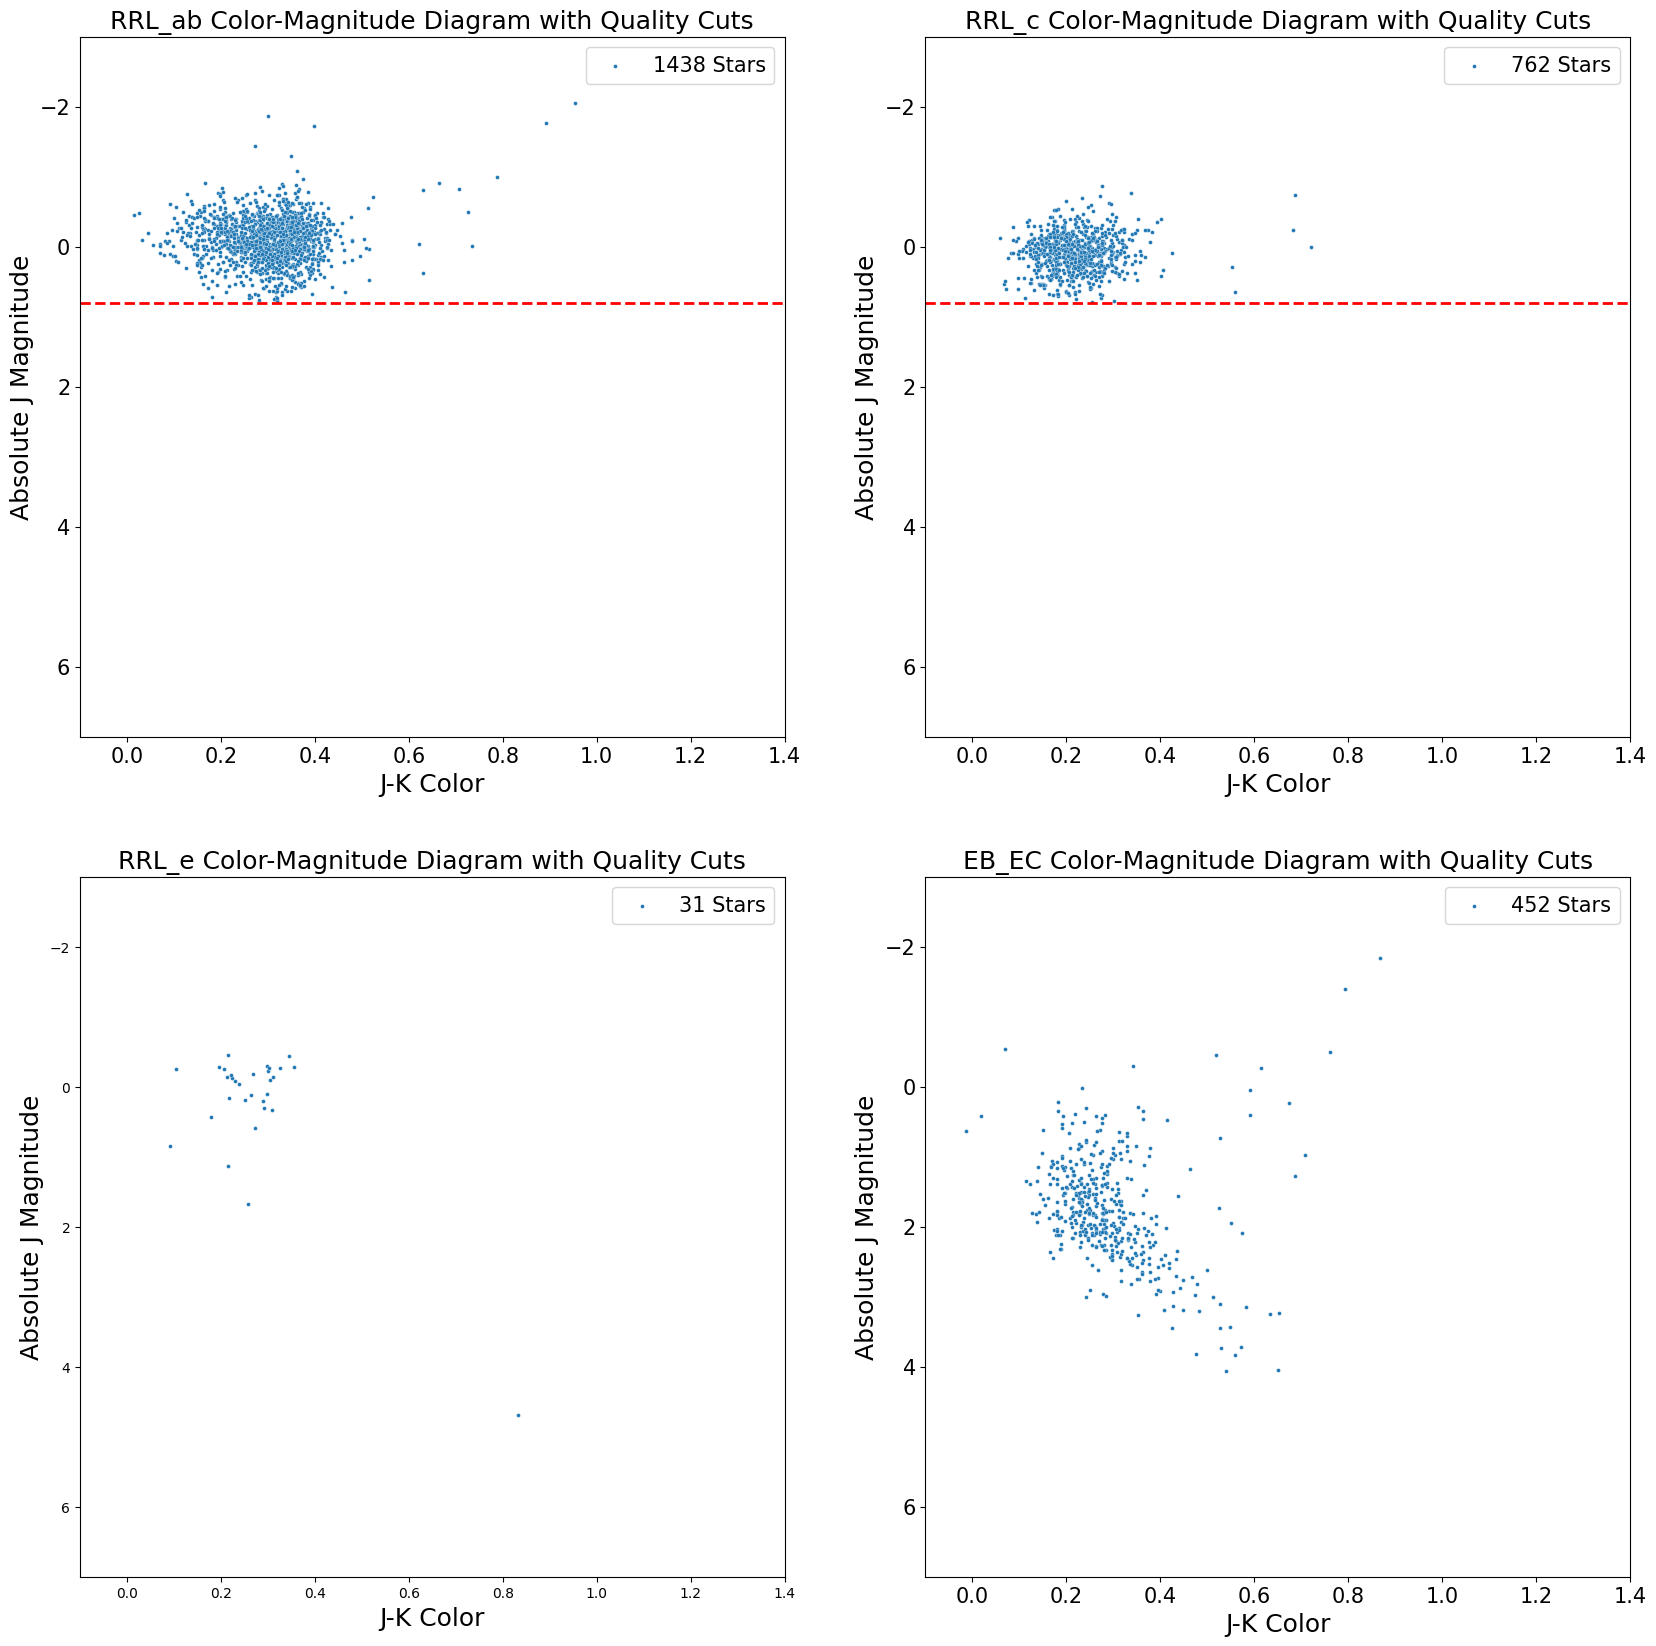

In [206]:
# Plotting
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(221)
sns.scatterplot(data=rrl_ab, x='J-K', y='abs_mag_J', s=8, label = f"{len(rrl_ab)} Stars")
ax1.invert_yaxis()
ax1.set_xlabel('J-K Color', size=18)
ax1.set_ylabel('Absolute J Magnitude', size=18)
ax1.set_title('RRL_ab Color-Magnitude Diagram with Quality Cuts', size=18)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.axhline(y=0.8, color='red', linestyle='--', linewidth=2)
ax1.legend(fontsize=15)
ax1.set_xlim(-0.1, 1.4)
ax1.set_ylim(7, -3)

ax2 = fig.add_subplot(222)
sns.scatterplot(data=rrl_c, x='J-K', y='abs_mag_J', s=8, label = f"{len(rrl_c)} Stars")
ax2.invert_yaxis()
ax2.set_xlabel('J-K Color', size=18)
ax2.set_ylabel('Absolute J Magnitude', size=18)
ax2.set_title('RRL_c Color-Magnitude Diagram with Quality Cuts', size=18)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.axhline(y=0.8, color='red', linestyle='--', linewidth=2)
ax2.legend(fontsize=15)
ax2.set_xlim(-0.1, 1.4)
ax2.set_ylim(7, -3)

ax5 = fig.add_subplot(223)
sns.scatterplot(data=rrl_e, x='J-K', y='abs_mag_J', s=8, label = f"{len(rrl_e)} Stars")
ax5.invert_yaxis()
ax5.set_xlabel('J-K Color', size=18)
ax5.set_ylabel('Absolute J Magnitude', size=18)
ax5.set_title('RRL_e Color-Magnitude Diagram with Quality Cuts', size=18)
ax5.legend(fontsize=15)
ax5.set_xlim(-0.1, 1.4)
ax5.set_ylim(7, -3)

ax4 = fig.add_subplot(224)
sns.scatterplot(data=eb_ec, x='J-K', y='abs_mag_J', s=8, label = f"{len(eb_ec)} Stars")
ax4.invert_yaxis()
ax4.set_xlabel('J-K Color', size=18)
ax4.set_ylabel('Absolute J Magnitude', size=18)
ax4.set_title('EB_EC Color-Magnitude Diagram with Quality Cuts', size=18)
ax4.tick_params(axis='both', which='major', labelsize=15)
ax4.legend(fontsize=15)
ax4.set_xlim(-0.1, 1.4)
ax4.set_ylim(7, -3)

plt.show()

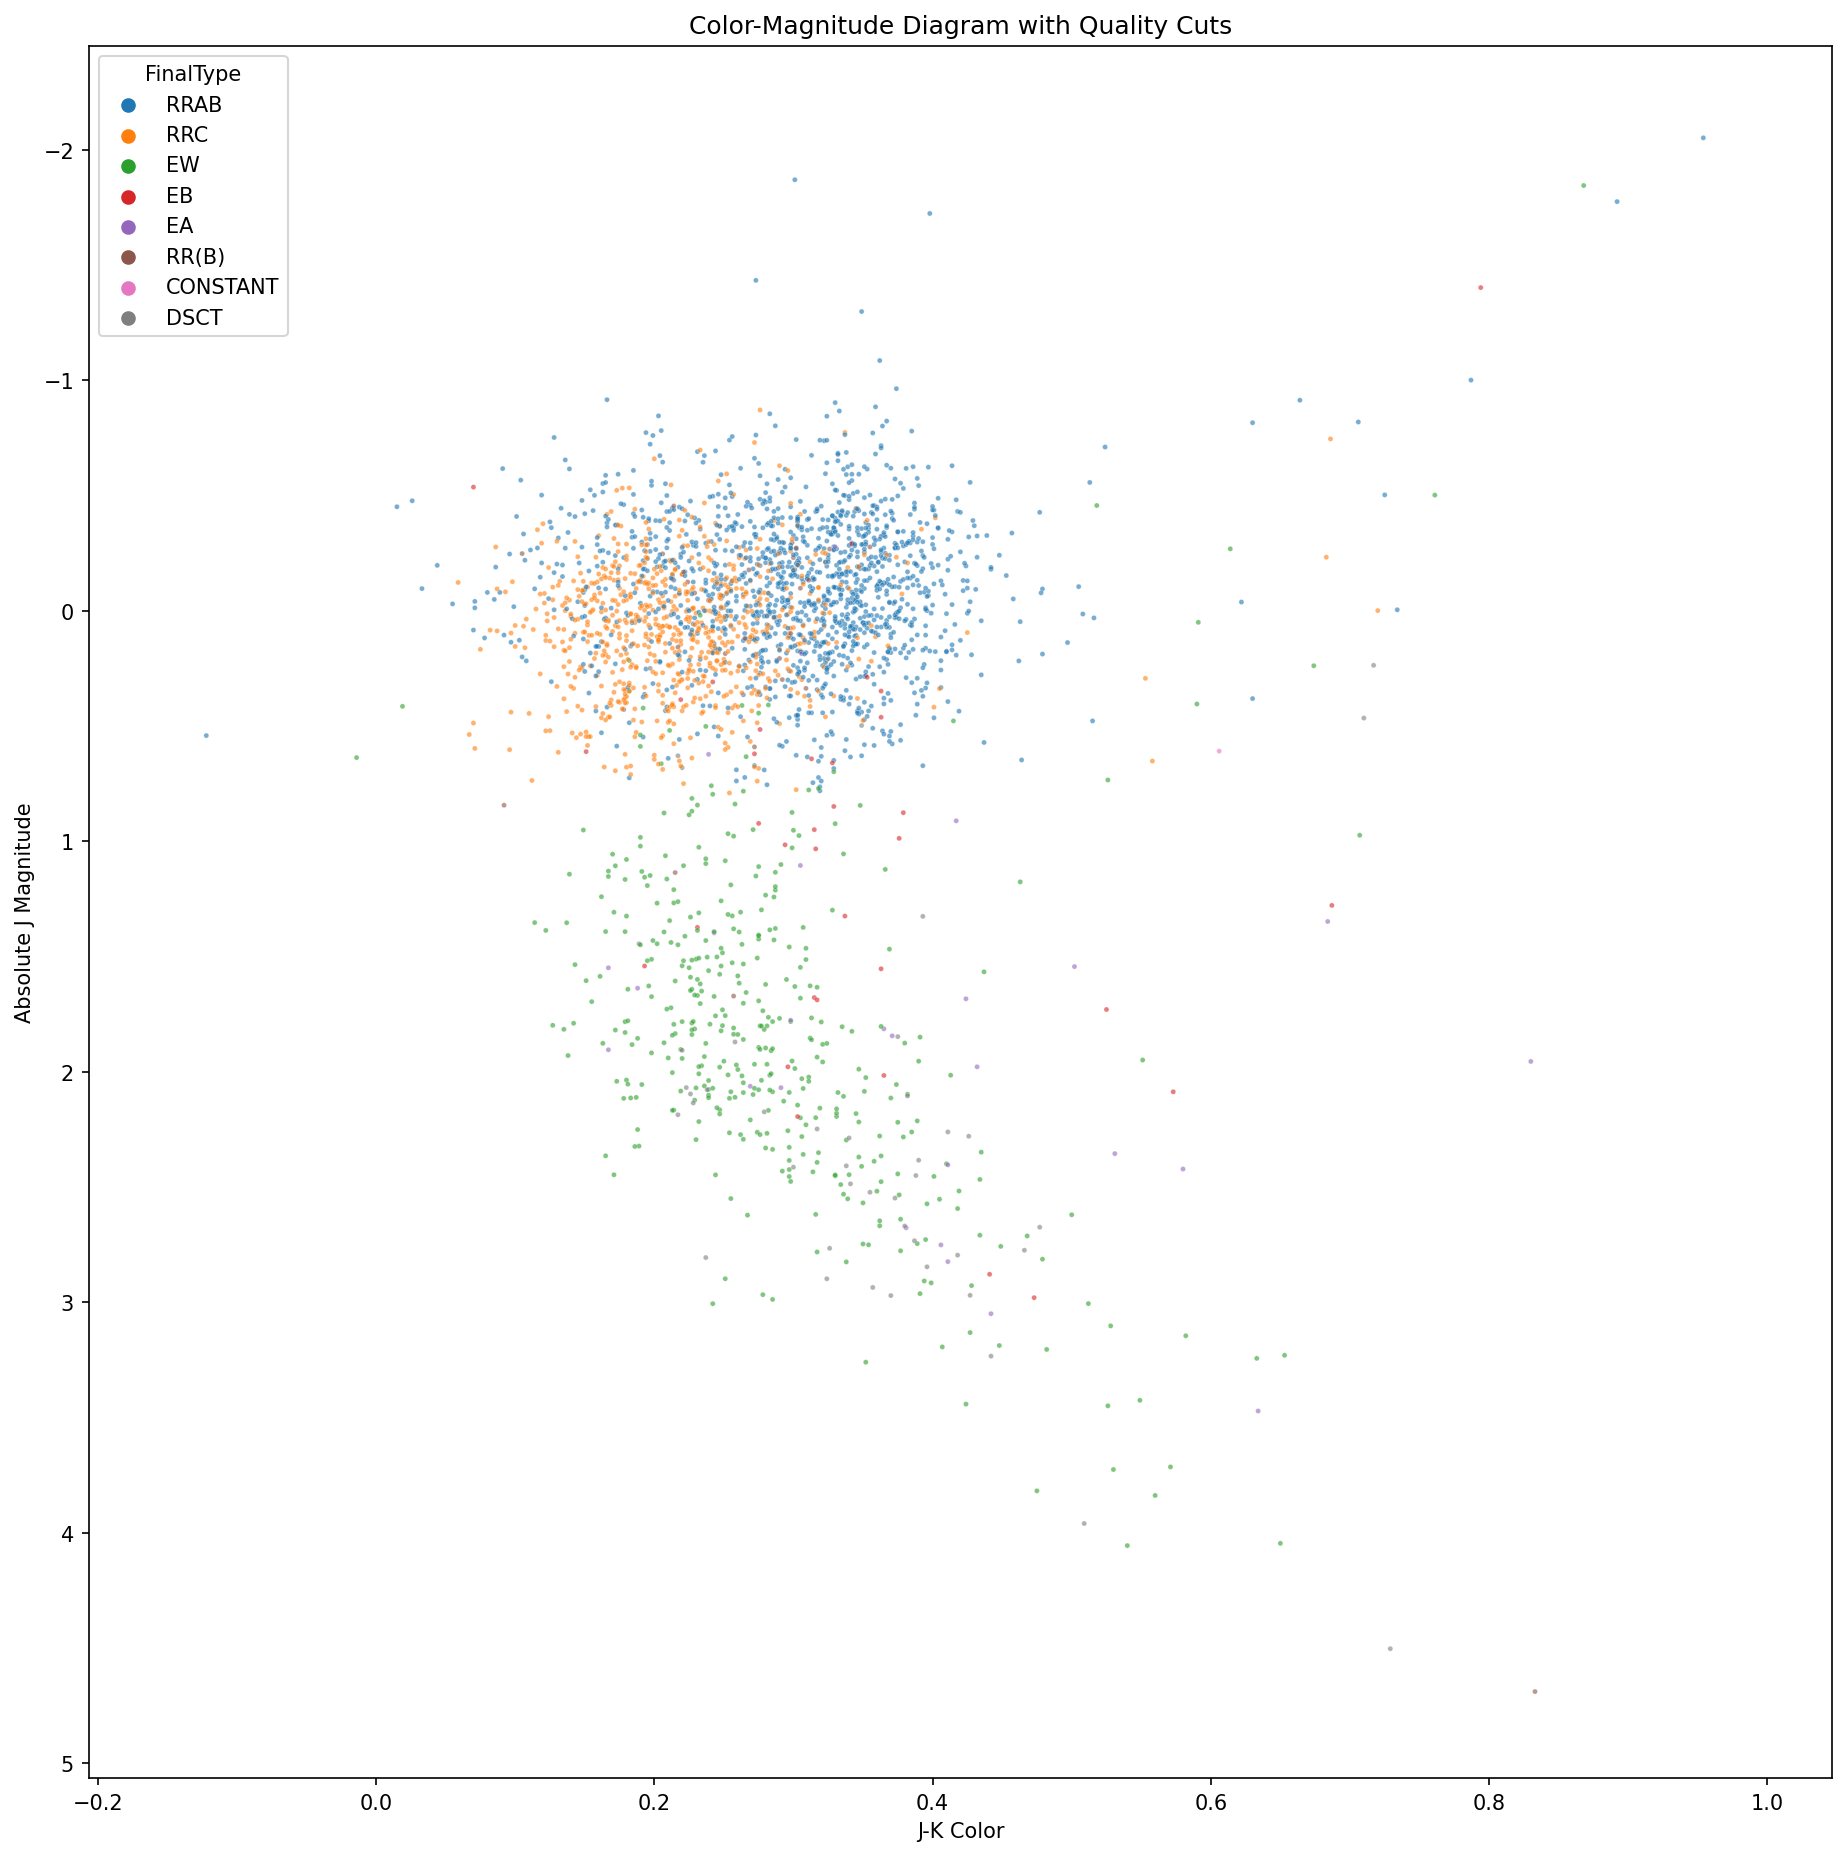

In [219]:
# Plotting
plt.figure(figsize=(15, 15), dpi = 150)
plt.errorbar(
    x=filtered_new['J-K'], 
    y=filtered_new['abs_mag_J'], 
    xerr=filtered_new['J-K_err'], 
    yerr=filtered_new['abs_mag_J_err'], 
    fmt='none', 
    ecolor='gray', 
    alpha=0
)
sns.scatterplot(
    data=filtered_new,
    x='J-K',
    y='abs_mag_J',
    hue='FinalType',
    s=6,
    alpha=0.6,
)
plt.gca().invert_yaxis()
plt.xlabel('J-K Color')
plt.ylabel('Absolute J Magnitude')
plt.title('Color-Magnitude Diagram with Quality Cuts')
plt.show()


In [207]:
filtered.groupby("FinalType").agg("count").reset_index().sort_values(by="ASASSN_id", ascending=False)

,FinalType,ASASSN_id,distance,distance_low,distance_high,g_mag,Gaia_name,G_mag,G_mag_err,abs_mag_G,...,VSX_name,J_minus_K,J-K,J-K_err,sigma_distance,sigma_dist_term,E(B-V),A_J,E(J-K),abs_mag_J_err
6,RRAB,1512,1512,1512,1512,1512,1512,1512,1512,1512,...,1512,1512,1512,1512,1512,1512,1512,1512,1512,1512
7,RRC,1298,1298,1298,1298,1298,1298,1298,1298,1298,...,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298
4,EW,418,418,418,418,418,418,418,418,418,...,418,418,418,418,418,418,418,418,418,418
1,DSCT,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46
3,EB,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
5,RR(B),31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
2,EA,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
0,CONSTANT,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [208]:
filtered_rr = filtered_new[
    (filtered_new["FinalType"] == "RRAB") |
    (filtered_new["FinalType"] == "RRC") |
    (filtered_new["FinalType"] == "RR(B)")
]
filtered_rr

,ASASSN_id,distance,distance_low,distance_high,g_mag,Gaia_name,G_mag,G_mag_err,abs_mag_G,abs_mag_G_low,...,VSX_name,J_minus_K,J-K,J-K_err,sigma_distance,sigma_dist_term,E(B-V),A_J,E(J-K),abs_mag_J_err
7,249108450355,2828,2736,2936,13.397,Gaia DR3 2853512332285518592,13.160,0.010,0.806,0.877,...,GV Peg,0.228,0.228,0.030414,100.0,0.076785,0.031868,0.029,0.016571,0.079927
8,111669995433,2382,2316,2472,13.186,Gaia DR3 2880528638650410624,13.047,0.007,0.896,0.957,...,ROTSE1 J000044.33 +375034.2,0.216,0.216,0.031145,78.0,0.071106,0.087912,0.080,0.045714,0.075160
21,489626456195,788,773,806,10.729,Gaia DR3 2336550174250087936,10.310,0.014,0.827,0.869,...,RU Scl,0.320,0.320,0.030610,16.5,0.045469,0.000000,0.000,0.000000,0.051414
22,343598279853,3578,3420,3758,13.989,Gaia DR3 4702887900907901184,13.686,0.013,0.841,0.939,...,NSV 5,0.202,0.202,0.036878,169.0,0.102565,0.025275,0.023,0.013143,0.105361
29,386548171330,1874,1796,1941,12.261,Gaia DR3 2414817603803476864,11.991,0.010,0.627,0.719,...,UU Cet,0.341,0.341,0.035355,72.5,0.084008,0.000000,0.000,0.000000,0.087649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25352,85900561705,1205,1180,1230,11.667,Gaia DR3 1944108945011315200,11.556,0.004,0.812,0.858,...,CzeV1295,0.218,0.218,0.031113,25.0,0.045051,0.110989,0.101,0.057714,0.051143
25353,395137554459,2114,2029,2198,12.611,Gaia DR3 2334529752915355520,12.401,0.011,0.775,0.865,...,TX Scl,0.328,0.328,0.031145,84.5,0.086797,0.000000,0.000,0.000000,0.089793
25358,661428743124,1911,1816,2018,12.260,Gaia DR3 2765589163416465792,12.065,0.010,0.465,0.575,...,V0618 Peg,0.303,0.303,0.031113,101.0,0.114766,0.063736,0.058,0.033143,0.117000
25359,627065854252,2928,2806,3045,12.996,Gaia DR3 6521271603997336832,12.812,0.006,0.439,0.532,...,CZ Phe,0.268,0.268,0.036797,119.5,0.088624,0.013187,0.012,0.006857,0.092653


In [209]:
ra_rad = np.radians(filtered_rr['VSX_RA'])
dec_rad = np.radians(filtered_rr['VSX_Dec'])

x = filtered_rr['distance'] * np.cos(dec_rad) * np.cos(ra_rad)
y = filtered_rr['distance'] * np.cos(dec_rad) * np.sin(ra_rad)
z = filtered_rr['distance'] * np.sin(dec_rad)

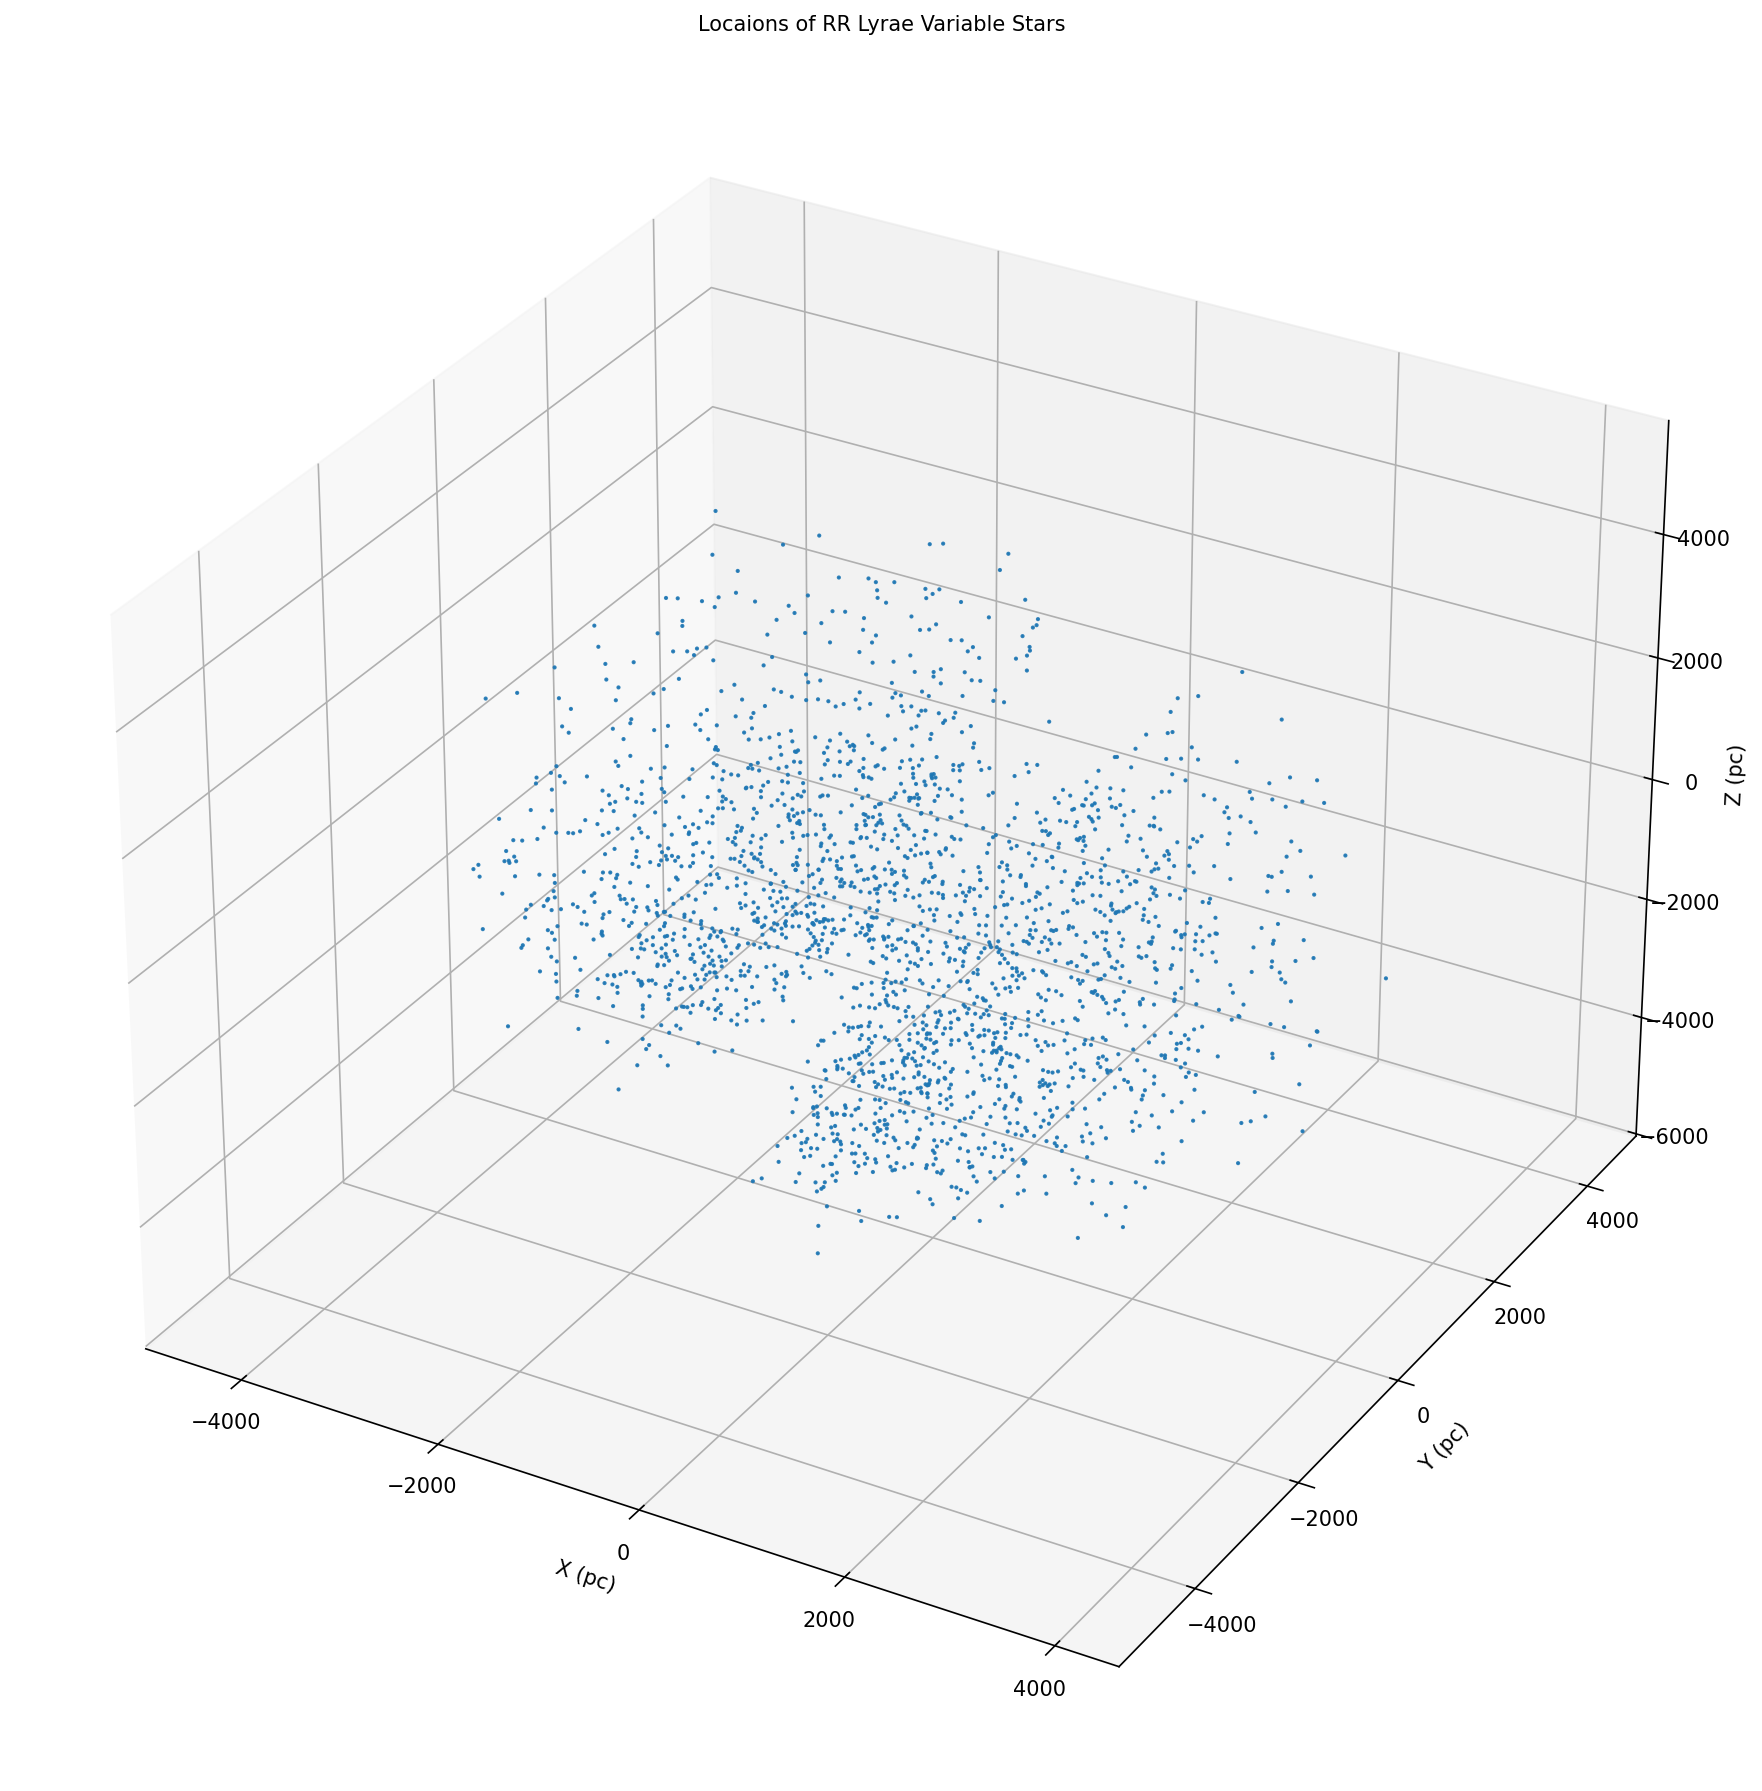

In [210]:
fig = plt.figure(figsize=(15, 15), dpi = 150)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, alpha = 0.9, s = 1)
ax.set_xlabel('X (pc)', size=10)
ax.set_ylabel('Y (pc)', size=10)
ax.set_zlabel('Z (pc)', size=10)
ax.set_title('Locaions of RR Lyrae Variable Stars', size=10)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.show()

In [211]:
ra_rad = np.radians(filtered_rr['VSX_RA'])
dec_rad = np.radians(filtered_rr['VSX_Dec'])

x = filtered_rr['distance'] * np.cos(dec_rad) * np.cos(ra_rad)
y = filtered_rr['distance'] * np.cos(dec_rad) * np.sin(ra_rad)
z = filtered_rr['distance'] * np.sin(dec_rad)

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=1.5,
        opacity=0.8
    )
)])

fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    width=800,
    height=800
)

fig.show()


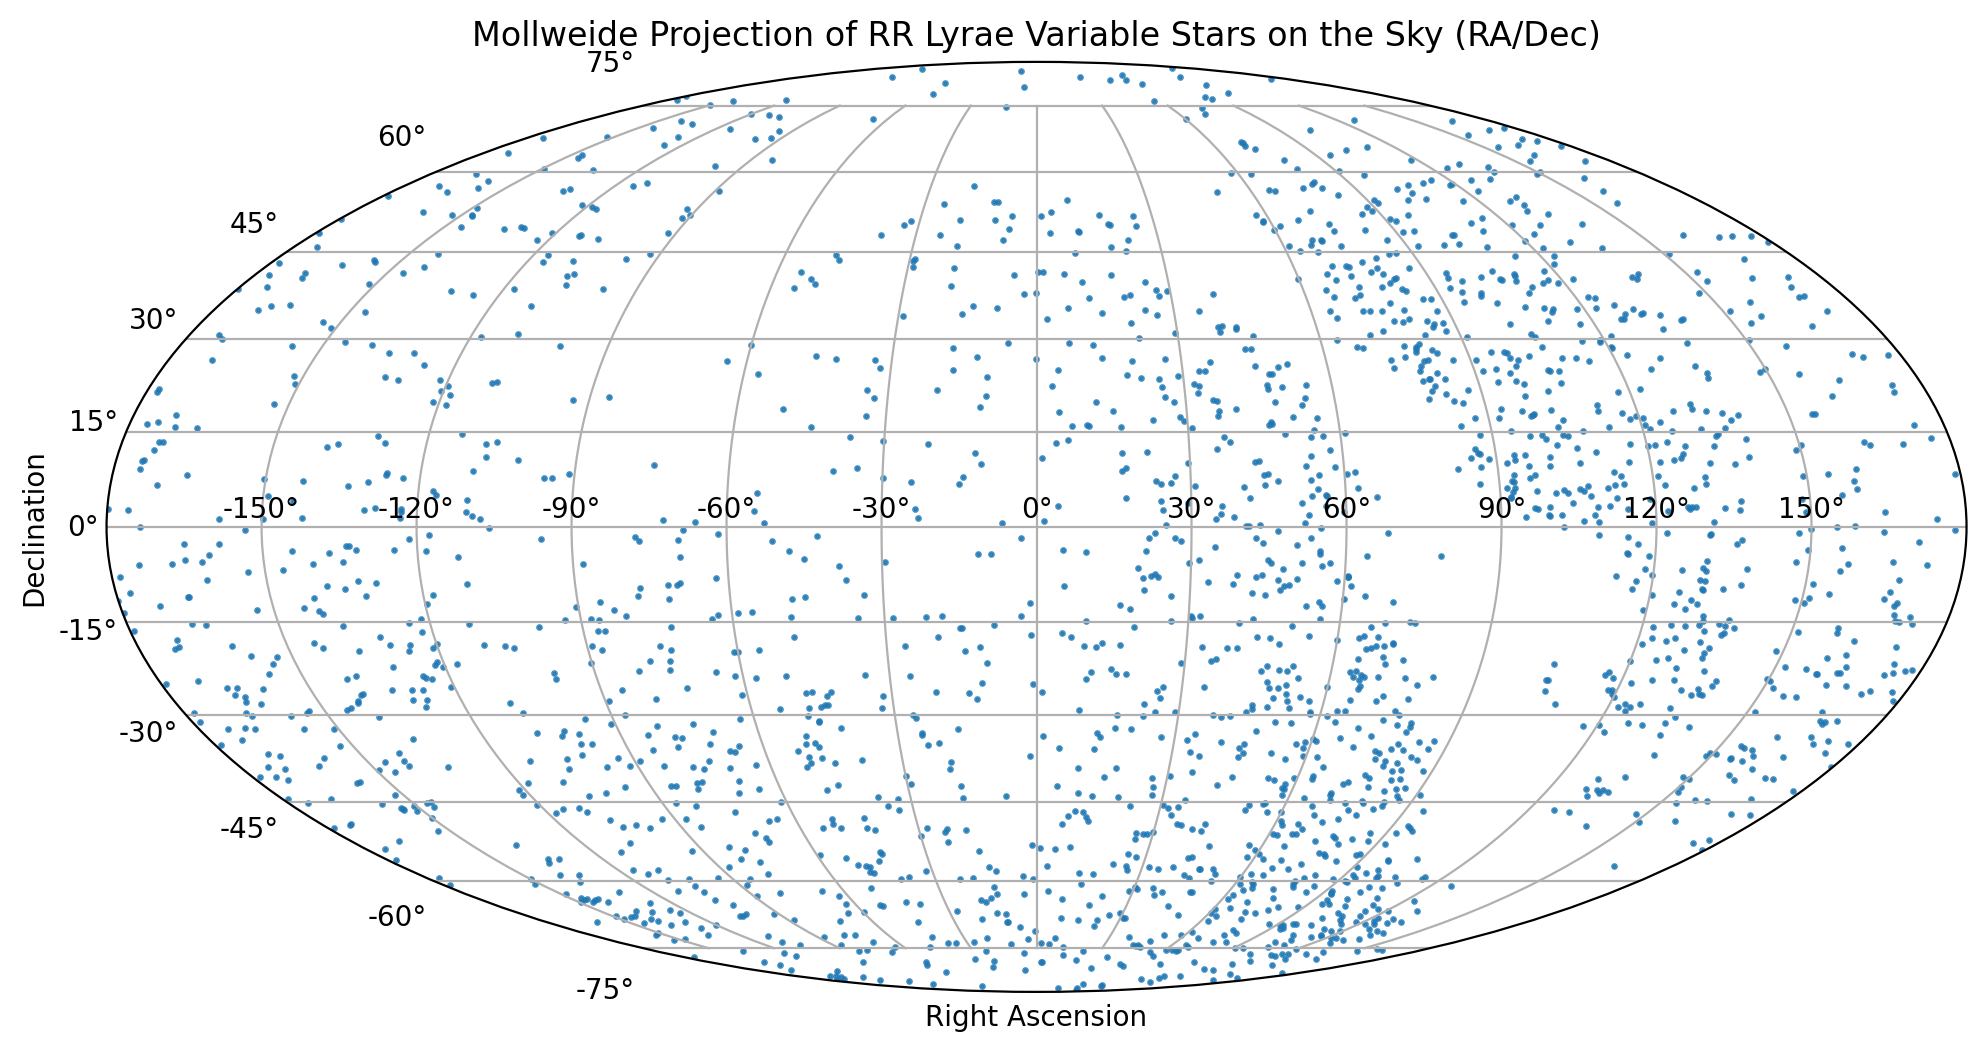

In [212]:
ra = np.radians(filtered_rr['VSX_RA'].values)
dec = np.radians(filtered_rr['VSX_Dec'].values)

# Shift RA from [0, 2π] to [-π, π] for Mollweide projection
ra = np.remainder(ra + 2*np.pi, 2*np.pi)  # Ensure RA is in [0, 2π]
ra[ra > np.pi] -= 2*np.pi  # Shift to [-π, π]
ra = -ra  # Flip RA for sky view (East left)

# Create Mollweide plot
fig = plt.figure(figsize=(12, 8), dpi=200)
ax = fig.add_subplot(111, projection='mollweide')

ax.scatter(ra, dec, s=2, alpha=0.8)

# Add grid and labels
ax.grid(True)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
ax.set_title('Mollweide Projection of RR Lyrae Variable Stars on the Sky (RA/Dec)')

plt.show()